# Predict Customer Clicked Ads Classification By Using Machine Learning

### **Import Libraries and Settings**

In [3]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


## Load Dataset

In [4]:
df = pd.read_csv('Clicked Ads Dataset.csv')

In [5]:
df.sample(10)

Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
953         953                     45.53   29  392909230.0   
377         377                     69.20   42  182167930.0   
210         210                     76.81   28  456205540.0   
578         578                     66.89   23  451037930.0   
408         408                     51.68   49          NaN   
885         885                     46.84   45  244325690.0   
677         677                     47.23   38  494077850.0   
194         194                     77.20   33  345278360.0   
195         195                     71.86   32  361433380.0   
848         848                     70.39   32  331501730.0   

     Daily Internet Usage       Male        Timestamp Clicked on Ad  \
953                141.58  Perempuan  4/22/2016 22:01           Yes   
377                123.80  Perempuan   6/17/2016 9:58           Yes   
210                217.85  Laki-Laki   7/3/2016 12:57            No   
578                208.24  Laki-Laki    1/4/2016 7:28            No   
408                258.62  Perempuan  6/28/2016 12:51           Yes   
885                123.22  Perempuan  5/15/2016 18:44           Yes   
677                149.80  Laki-Laki   6/22/2016 5:22           Yes   
194                254.05  Laki-Laki  2/12/2016 20:36            No   
195                116.53  Perempuan   5/17/2016 6:14           Yes   
848                261.52  Laki-Laki  7/12/2016 10:56            No   

                city                       province    category  
953            Depok                     Jawa Barat      Health  
377            Batam                 Kepulauan Riau      Travel  
210  Jakarta Selatan  Daerah Khusus Ibukota Jakarta      Travel  
578           Bekasi                     Jawa Barat   Furniture  
408         Surabaya                     Jawa Timur     Finance  
885         Semarang                    Jawa Tengah  Electronic  
677            Batam                 Kepulauan Riau  Electronic  
194        Tangerang                         Banten      Health  
195  Jakarta Selatan  Daerah Khusus Ibukota Jakarta  Electronic  
848   Bandar Lampung                        Lampung     Fashion

In [6]:
# Checking shape of dataframe
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns {df.shape[1]}')

Number of rows: 1000
Number of columns 11


The original dataframe has 1000 rows and 11 columns.

## Initial Transformation

In [7]:
# Drop ID/index column
df.drop(columns='Unnamed: 0', inplace=True)

# Rename column name for and maintain column name similarity
df.rename(columns={'Male': 'Gender',
                   'Timestamp': 'Visit Time',
                   'city' : 'City',
                   'province' : 'Province',
                   'category' : 'Category'}, inplace=True)

# Re-arrange column (target 'Clicked on Ad' at the end --> personal preference)
df_1 = df.drop(columns='Clicked on Ad')
df_2 = df['Clicked on Ad']
df = pd.concat([df_1, df_2], axis='columns')

# Other way to re-arrange column
# df = df[[col for col in df if col != 'Clicked on Ad'] + ['Clicked on Ad']]

In [8]:
# Checking dataframe after initial transformation
df.sample(10)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
285                     75.15   22  364077000.0                212.87   
119                     88.97   45  344889860.0                152.49   
59                      41.82   41  173970300.0                156.36   
433                     85.23   36  449670970.0                212.92   
54                      62.31   47  439057990.0                119.30   
748                     45.11   58  278598110.0                195.69   
772                     88.85   40  408541840.0                213.96   
995                     72.97   30  499691990.0                208.58   
890                     76.65   31  427822500.0                238.43   
352                     78.19   30  437331930.0                228.81   

        Gender       Visit Time           City                       Province  \
285  Laki-Laki   5/4/2016 12:06  Jakarta Pusat  Daerah Khusus Ibukota Jakarta   
119  Perempuan  6/11/2016 18:32        Bandung                     Jawa Barat   
59   Perempuan  5/26/2016 22:49      Pakanbaru                           Riau   
433  Laki-Laki  2/27/2016 12:34          Batam                 Kepulauan Riau   
54   Perempuan   2/14/2016 7:36      Samarinda               Kalimantan Timur   
748  Perempuan   1/5/2016 16:26         Cimahi                     Jawa Barat   
772  Perempuan  1/17/2016 18:45       Surabaya                     Jawa Timur   
995  Laki-Laki  2/11/2016 21:49       Semarang                    Jawa Tengah   
890  Perempuan   4/18/2016 7:00          Batam                 Kepulauan Riau   
352  Perempuan   1/31/2016 6:14      Pakanbaru                           Riau   

    Category Clicked on Ad  
285     Food            No  
119     Food           Yes  
59     House           Yes  
433  Finance            No  
54    Health           Yes  
748    House           Yes  
772  Fashion            No  
995  Finance           Yes  
890   Travel            No  
352     Food            No

In [9]:
# Dataset overview
desc_col = []

for col in df.columns :
    desc_col.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df) * 100, 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=desc_col, columns='Feature, Data Type, Null Values, Null Percentage (%), Duplicated Values, Unique Values, 5 Unique Sample'.split(","))
desc_df

Feature  Data Type   Null Values   Null Percentage (%)  \
0  Daily Time Spent on Site    float64            13                   1.3   
1                       Age      int64             0                   0.0   
2               Area Income    float64            13                   1.3   
3      Daily Internet Usage    float64            11                   1.1   
4                    Gender     object             3                   0.3   
5                Visit Time     object             0                   0.0   
6                      City     object             0                   0.0   
7                  Province     object             0                   0.0   
8                  Category     object             0                   0.0   
9             Clicked on Ad     object             0                   0.0   

    Duplicated Values   Unique Values  \
0                   0             890   
1                   0              43   
2                   0             987   
3                   0             955   
4                   0               2   
5                   0             997   
6                   0              30   
7                   0              16   
8                   0              10   
9                   0               2   

                                                                    5 Unique Sample  
0                                               [68.95, 80.23, 69.47, 74.15, 68.37]  
1                                                              [35, 31, 26, 29, 23]  
2   [432837300.0, 479092950.00000006, 418501580.0, 383643260.0, 517229930.00000006]  
3                                           [256.09, 193.77, 236.5, 245.89, 225.58]  
4                                                       [Perempuan, Laki-Laki, nan]  
5   [3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:35, 1/10/2016 2:31, 6/3/2016 3:36]  
6                                 [Jakarta Timur, Denpasar, Surabaya, Batam, Medan]  
7  [Daerah Khusus Ibukota Jakarta, Bali, Jawa Timur, Kepulauan Riau, Sumatra Utara]  
8                                     [Furniture, Food, Electronic, House, Finance]  
9                                                                         [No, Yes]

## **About The Dataset**

**Overview:**
- Dataset contains 1000 rows, 10 features and 1 **Unnamed: 0** column which is the ID column that is dropped.
- Dataset consists of 3 data types; float64, int64 and object.
- `Visit Time` (originally `Timestampt`) feature will be changed into datetime data type.
- Dataset contains null values in various columns.

**Feature Descriptions**

- `Daily Time Spent on Site`: Time spent on the site (Minutes)
- `Age`: Age of the customer
- `Area Income`: Average income of geographical area of consumer
- `Daily Internet Usage`: Time spent on the internet (Minutes)
- `Gender`: Gender of the customer
- `Visit Time`: Time the customer visit on the website
- `City`: City of customer's residence
- `Province`: Province of customer's residence
- `Category`: Category of the advertisement
- `Clicked on Ad`: Whether the customer clicked the ad or not (Target Variable)

In [10]:
# Grouping columns based on data types
nums_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

cats_cols = ['Gender', 'City', 'Province', 'Category', 'Clicked on Ad']

date_cols = ['Visit Time']

- Categorical columns (5 columns): 
    - `Gender` : nominal
    - `City` : nominal
    - `Province` : nominal
    - `Category` : nominal
    - `Clicked on Ad` : nominal (Binary 0 & 1)

- Numerical/Continuous columns (4 columns) :

    - `Daily Time Spent on Site, Age, Area Income, Daily Internet Usage`

- Date column (1 column) :
    -  `Visit Time`

In [11]:
# Data type correction for Visit Time
df['Visit Time'] = pd.to_datetime(df['Visit Time'])

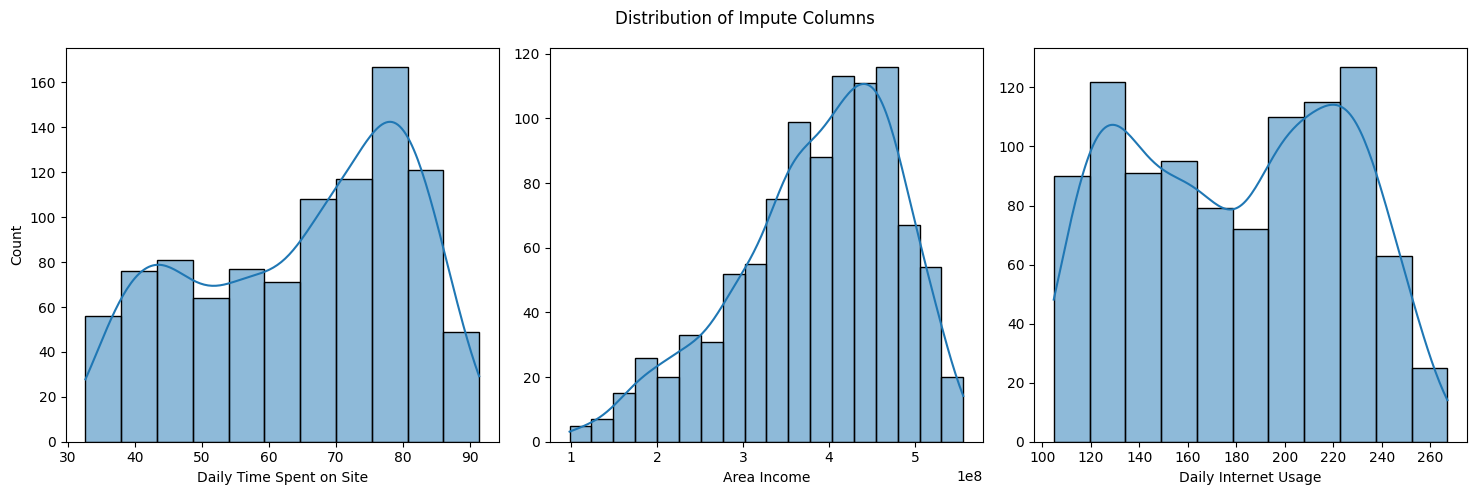

In [12]:
# Checking distribution in columns with missing value for proper imputation method
impute_col = ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histograms for each column
for i, col in enumerate(impute_col):
    sns.histplot(data=df, x=col, kde=True, ax=ax[i])
    if i != 0:
        ax[i].set_ylabel(None)

plt.suptitle('Distribution of Impute Columns')
plt.tight_layout()
plt.show()

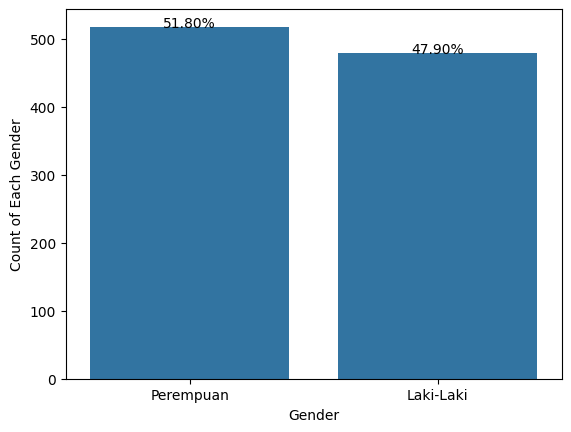

In [13]:
ax = sns.countplot(data=df, x='Gender')

# Calculate the percentage for each category
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1,
            '{:.2f}%'.format((height / total
                              ) * 100),
            ha="center")
plt.ylabel('Count of Each Gender')
plt.show()

> Imputation method based on distribution :

- Daily Time Spent on Site and Daily Internet Usage : mean
- Area Income : median
- Gender : mode

In [14]:
# Impute missing values
df['Daily Time Spent on Site'] = df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean())
df['Daily Internet Usage'] = df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean())
df['Area Income'] = df['Area Income'].fillna(df['Area Income'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# **STAGE 1 : EXPLORATORY DATA ANALYSIS (EDA)**

## Statistical Summary

In [15]:
# Numerical columns
nums_summary = df[nums_cols].describe().transpose()[['mean', 'std', '50%', 'min', 'max']]
nums_summary['range'] = nums_summary['max'] - nums_summary['min']
nums_summary['coefficient of variation'] = nums_summary['std'] / nums_summary['mean']

nums_summary.rename(columns={'50%' : 'median'}, inplace=True)

nums_summary

mean           std        median  \
Daily Time Spent on Site  6.492952e+01  1.574127e+01  6.778000e+01   
Age                       3.600900e+01  8.785562e+00  3.500000e+01   
Area Income               3.850493e+08  9.347971e+07  3.990683e+08   
Daily Internet Usage      1.798636e+02  4.362795e+01  1.810650e+02   

                                  min           max         range  \
Daily Time Spent on Site        32.60  9.143000e+01  5.883000e+01   
Age                             19.00  6.100000e+01  4.200000e+01   
Area Income               97975500.00  5.563936e+08  4.584181e+08   
Daily Internet Usage           104.78  2.670100e+02  1.622300e+02   

                          coefficient of variation  
Daily Time Spent on Site                  0.242436  
Age                                       0.243982  
Area Income                               0.242773  
Daily Internet Usage                      0.242561

In [16]:
# Categorical columns
cats_summary = df[cats_cols].describe().transpose()

cats_summary['bottom'] = [df[col].value_counts().idxmin() for col in cats_cols]
cats_summary['freq_bottom'] = [df[col].value_counts().min() for col in cats_cols]

cats_summary

count unique                            top freq  \
Gender         1000      2                      Perempuan  521   
City           1000     30                       Surabaya   64   
Province       1000     16  Daerah Khusus Ibukota Jakarta  253   
Category       1000     10                       Otomotif  112   
Clicked on Ad  1000      2                             No  500   

                         bottom  freq_bottom  
Gender                Laki-Laki          479  
City                     Serang           11  
Province       Kalimantan Barat           12  
Category                   Bank           90  
Clicked on Ad                No          500

In [17]:
# Date columns
dates_summary = df[date_cols].describe().transpose()
dates_summary['date_data_range'] = dates_summary['max'] - dates_summary['min']

dates_summary

count                        mean                  min  \
Visit Time  1000  2016-04-10 10:33:36.840000  2016-01-01 02:52:00   

                            25%                  50%                  75%  \
Visit Time  2016-02-18 02:55:15  2016-04-07 17:27:00  2016-05-31 03:18:00   

                            max    date_data_range  
Visit Time  2016-07-24 00:22:00  204 days 21:30:00

The data extracted for analysis are only around 6 months, nearly 7.

## Univariate Analysis

### Numerical

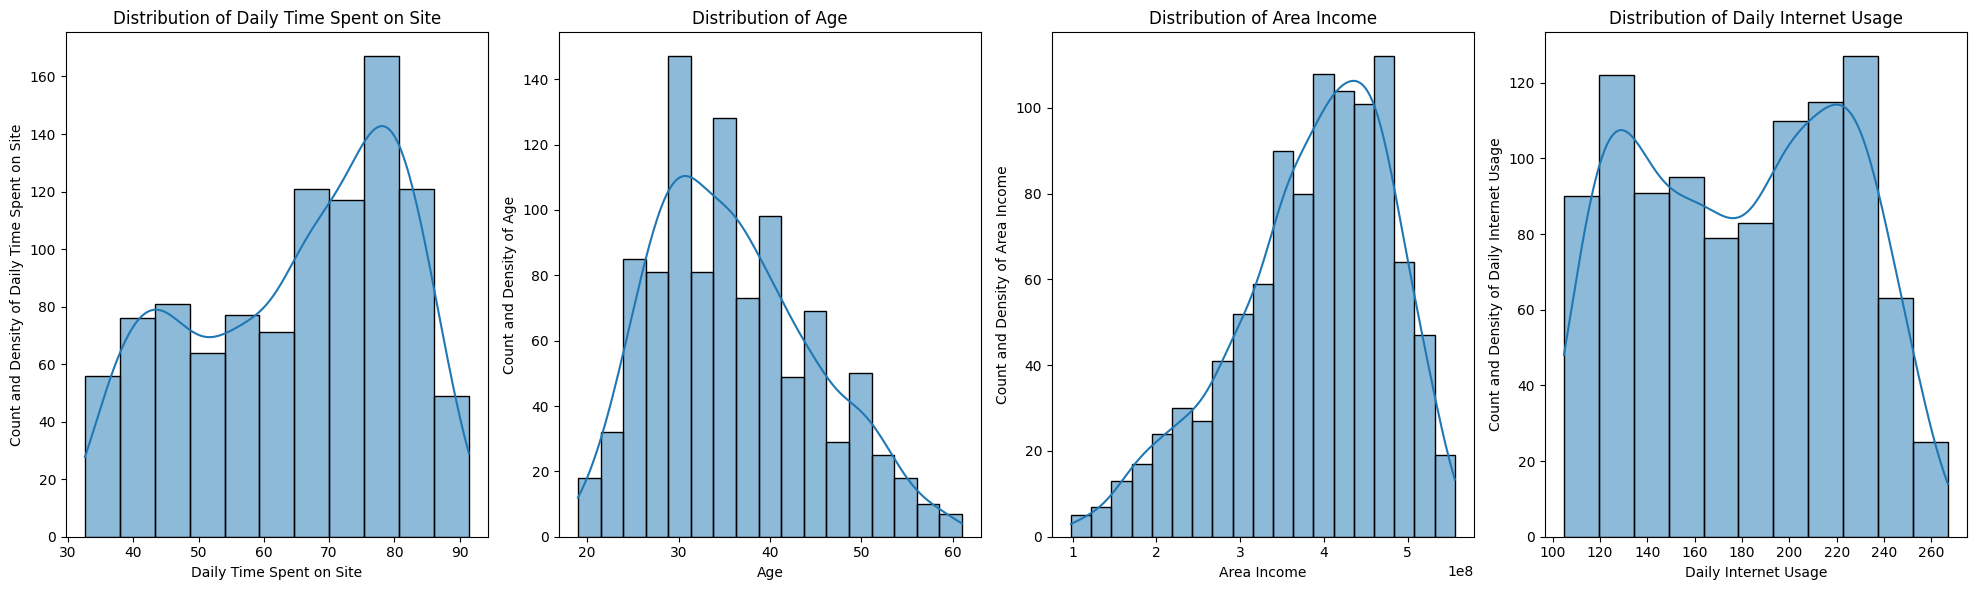

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.histplot(data=df, x=col, ax=ax[i], kde=True)
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_ylabel(f'Count and Density of {col}')
    ax[i].set_xlabel(f'{col}')

plt.tight_layout()
plt.show()

In [19]:
# Distribution categorization
from scipy.stats import skew
from scipy.stats import kurtosis

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in nums_cols :
    data = df[column]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]

    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    # Distribution conditions for normal and skewed
    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"

    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":nums_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# Distribution conditions for uniform and bimodal
dist.loc[dist['Column Name'].isin(['Daily Internet Usage']), 'Type of Distribution'] = 'Uniform Distribution'
dist.loc[dist['Column Name'].isin(['Column Name']), 'Type of Distribution'] = 'Bimodal Distribution'

dist

Column Name  Skewness  Kurtosis  \
0  Daily Time Spent on Site    -0.372    -1.074   
1                       Age     0.478    -0.405   
2               Area Income    -0.653    -0.079   
3      Daily Internet Usage    -0.032    -1.258   

                         Type of Distribution  
0  Moderately Normal Distribution (Symmetric)  
1  Moderately Normal Distribution (Symmetric)  
2  Moderately Normal Distribution (Symmetric)  
3                        Uniform Distribution

Distribution types of each numerical column can be seen in above dataframe, that is almost all of them are categorized as normal distribution. 

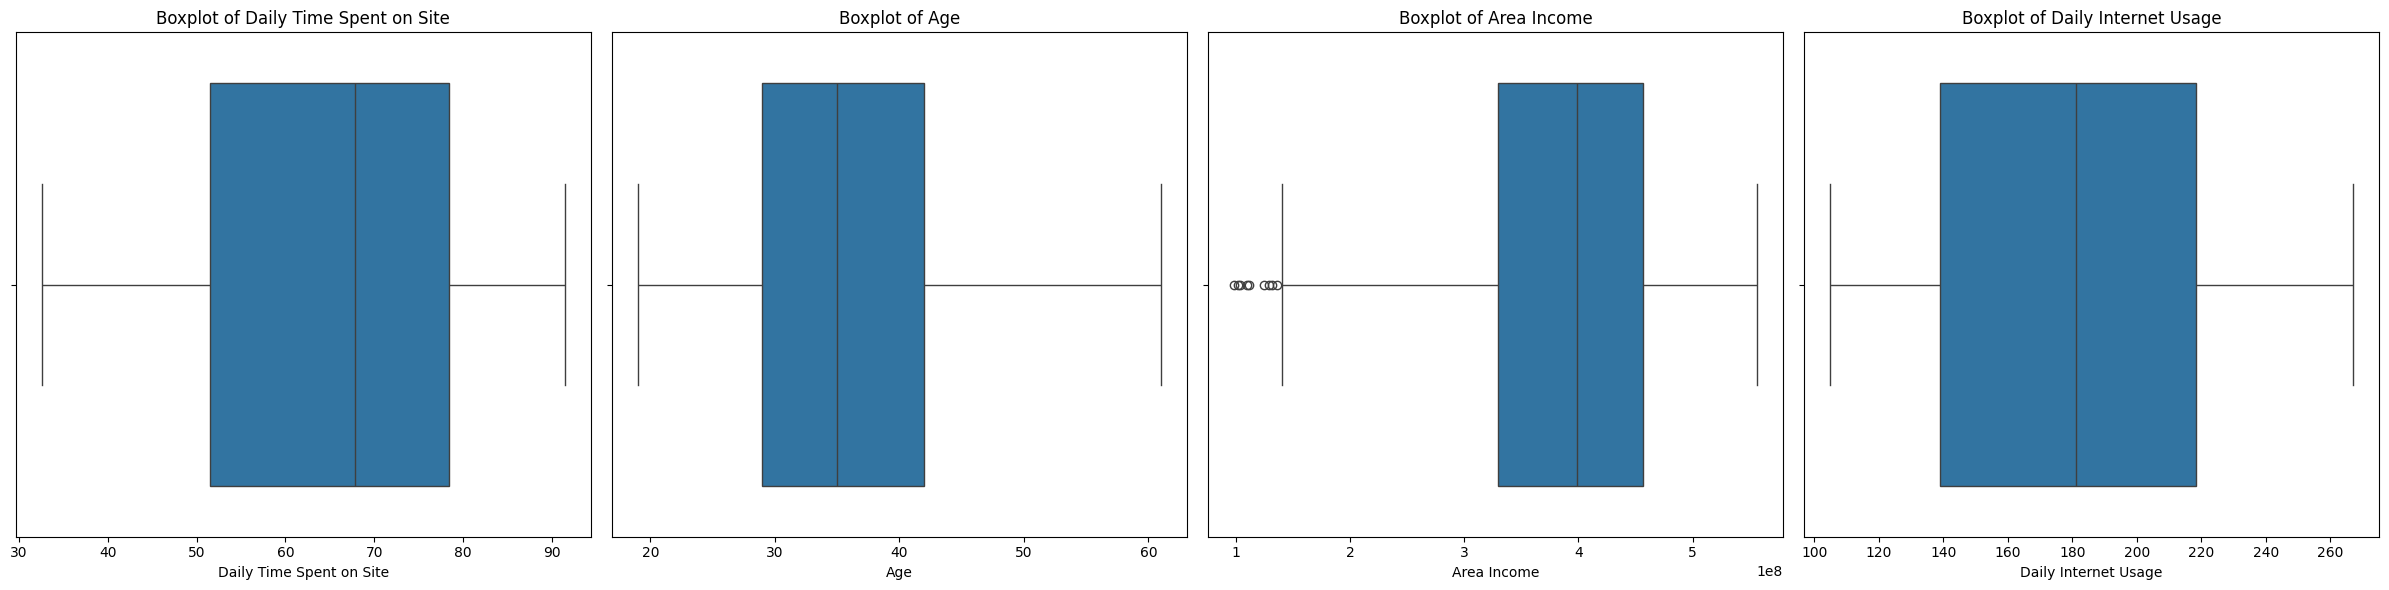

In [20]:
# Boxplot
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(24, 6))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.boxplot(data=df, ax=ax[i], x=col)
    ax[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

**Major Findings :**

- The distribution of our customer's Daily Time Spent on Site, Age, and Area Income are moderately normal distribution while Daily Internet Usage is uniform distribution.
- Our customers usually spent 64 minutes per day on our site, have an average of age of 36, the area income of our customers is Rp.38,000,000, and average their daily internet usage is 3 hours.

In [21]:
# Outlier detection for original data
print(f'Amount of Rows: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_bound = []
high_bound = []

filtered_entries = np.array([True] * len(df))

for col in nums_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_bound.append(lower_bound)
    high_bound.append(upper_bound)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries

print(f'Amount of Outlier Rows : {len(df[~filtered_entries])}')
print(f'Amount of Non-Outlier Rows : {len(df[filtered_entries])}')
print(f'Percentage of Outliers : {round(len(df[~filtered_entries]) / len(df) * 100, 2)}')
print()

percentage_outlier = np.array(outlier) / len(df) * 100
check_outliers = pd.DataFrame({
    'Column Name':nums_cols,
    'Outlier Exist': is_outlier,
    'Lower Limit': low_bound,
    'Upper Limit': high_bound,
    'Outlier Data': outlier,
    'Non-Outlier Data': no_outlier,
    'Percentage of Outlier': percentage_outlier
})

check_outliers

Amount of Rows: 1000
Amount of Outlier Rows : 9
Amount of Non-Outlier Rows : 991
Percentage of Outliers : 0.9



Column Name  Outlier Exist   Lower Limit   Upper Limit  \
0  Daily Time Spent on Site          False  1.133375e+01  1.185637e+02   
1                       Age          False  9.500000e+00  6.150000e+01   
2               Area Income           True  1.395105e+08  6.470028e+08   
3      Daily Internet Usage          False  2.011250e+01  3.371925e+02   

   Outlier Data  Non-Outlier Data  Percentage of Outlier  
0             0              1000                    0.0  
1             0              1000                    0.0  
2             9               991                    0.9  
3             0              1000                    0.0

### Categorical

In [22]:
cats_cols

['Gender', 'City', 'Province', 'Category', 'Clicked on Ad']

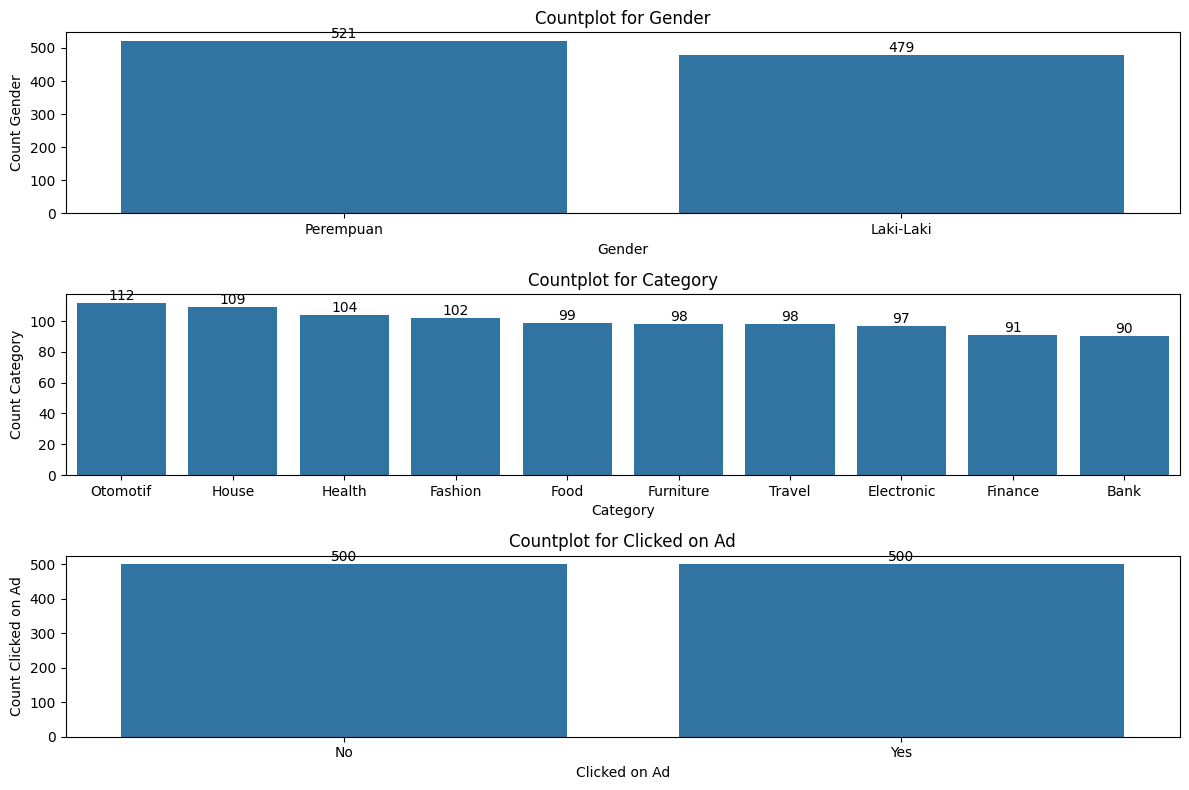

In [23]:
# Categorical Countplot (only for gender and category)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
ax = ax.flatten()

cats_cols_few = ['Gender', 'Category', 'Clicked on Ad']

for i, col in enumerate(cats_cols_few):
    sns.countplot(data=df, x=col, ax=ax[i], order=df[col].value_counts().index)
    ax[i].set_title(f'Countplot for {col}')
    ax[i].set_ylabel(f'Count {col}')
    ax[i].tick_params(axis='x')
    ax[i].bar_label(ax[i].containers[0])

plt.tight_layout()
plt.show()

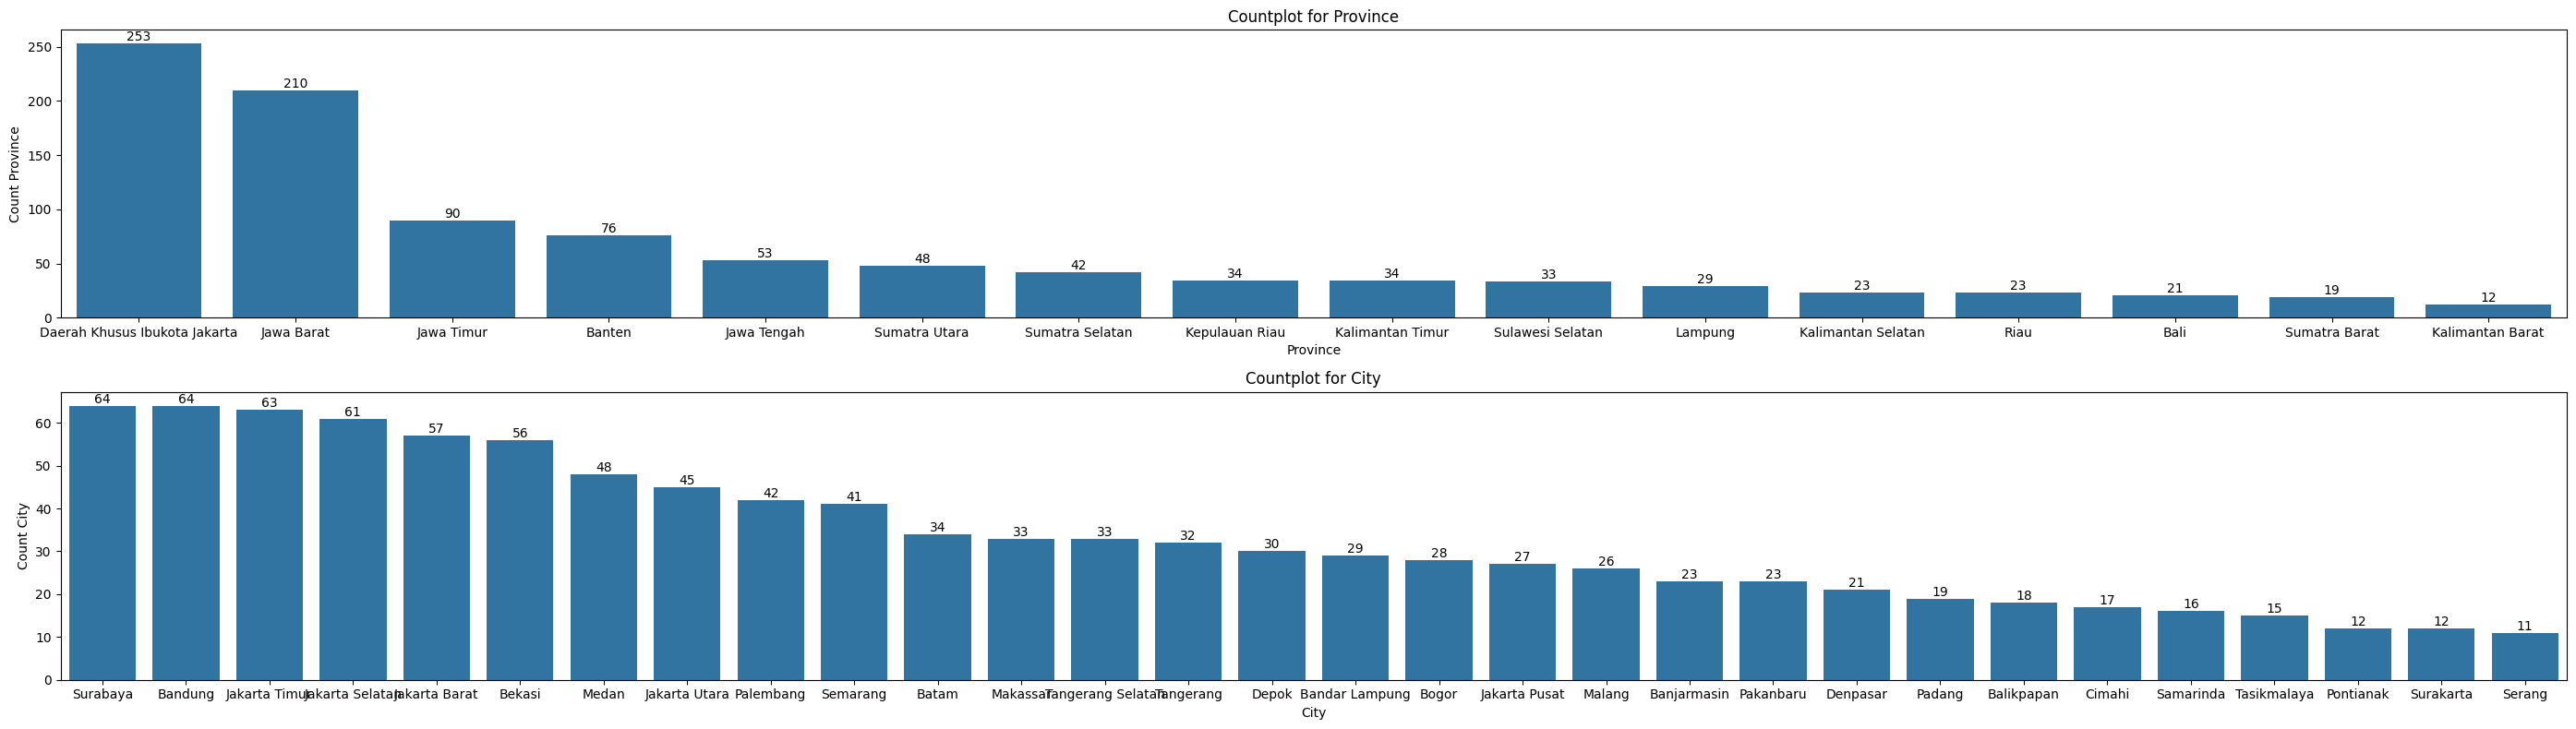

In [24]:
# Categorical Countplot (for Province and City)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(28, 8))
ax = ax.flatten()

cats_cols_many = ['Province', 'City']

for i, col in enumerate(cats_cols_many):
    sns.countplot(data=df, x=col, ax=ax[i], order=df[col].value_counts().index)
    ax[i].set_title(f'Countplot for {col}')
    ax[i].set_ylabel(f'Count {col}')
    ax[i].tick_params(axis='x')
    ax[i].bar_label(ax[i].containers[0])

plt.tight_layout()
plt.show()

**Major Findings:**

- The distribution of male and female `Gender` is almost equal
- `Clicked on Ad target` variable has an equal distribution of No and Yes.
- `Province` has 2 dominant values: DKI Jakarta and Jawa Barat.
- `Category` is almost equally distributed among the all the values.

## Bivariate Analysis

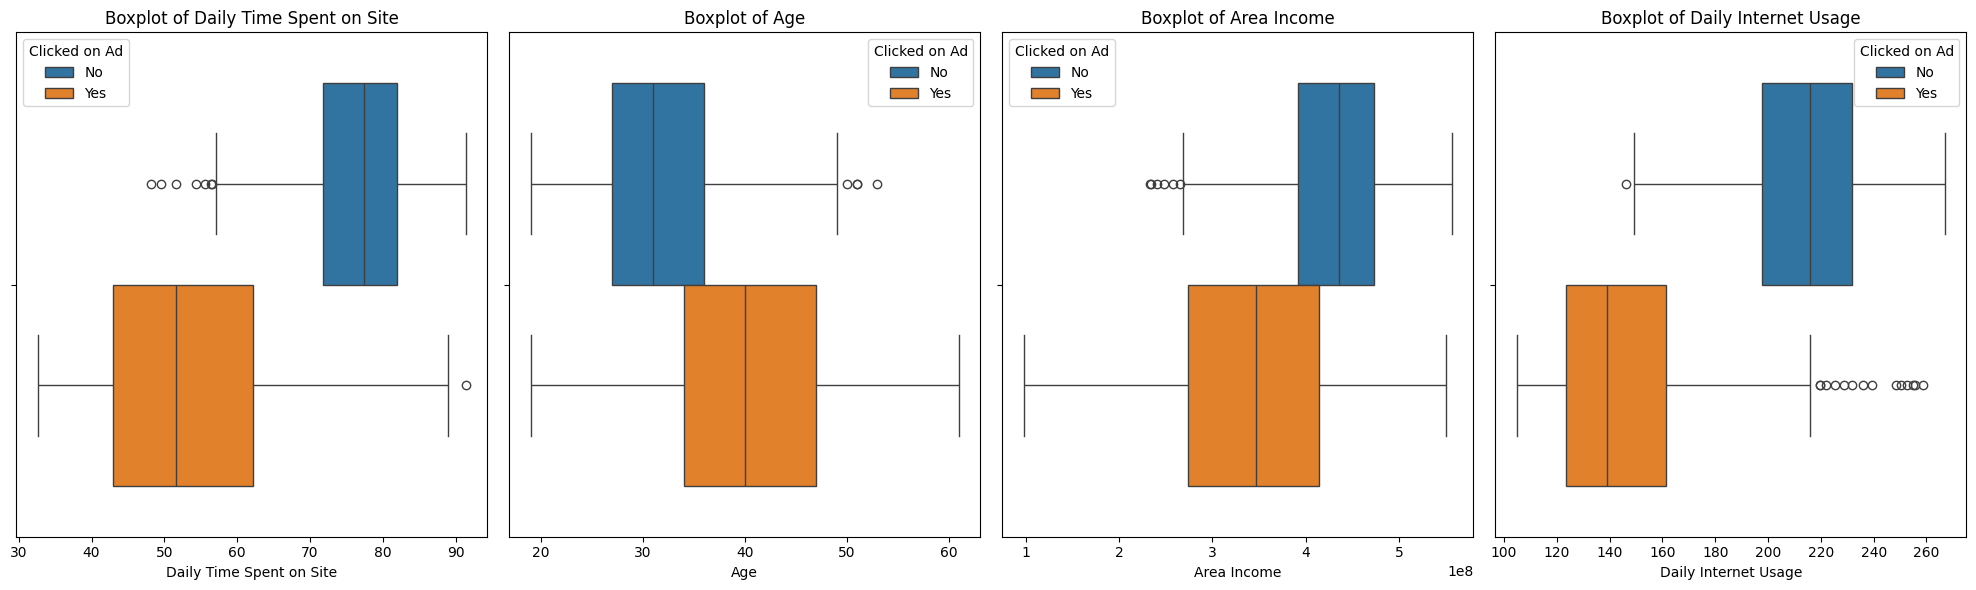

In [25]:
# Boxplot with hue target
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.boxplot(data=df, ax=ax[i], x=col, hue='Clicked on Ad')
    ax[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

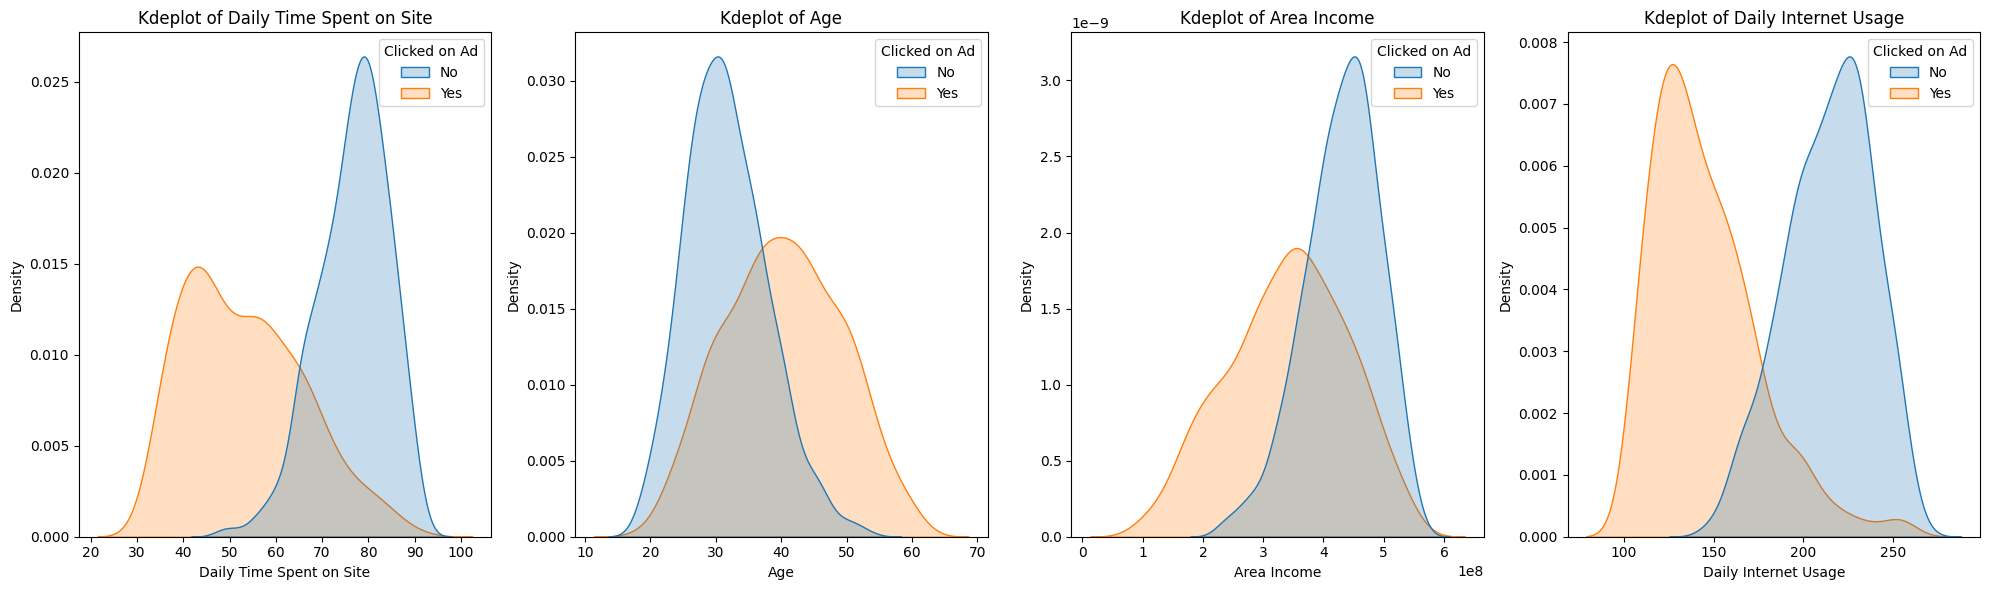

In [26]:
# Kdeplot with hue target
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.kdeplot(data=df, ax=ax[i], x=col, hue='Clicked on Ad', fill=True)
    ax[i].set_title(f'Kdeplot of {col}')

plt.tight_layout()
plt.show()

**Major Findings:**

- The more time customers spent time on the site, the less likely they will click on an ad.
- The average age of customers that clicked on an ad is 40, while the average for those that didn't is 31.
- The average income of customers that clicked on an ad is considerably lower than those that didn't. 
- The more time customers use the internet daily, the less likely they wil click on an ad.

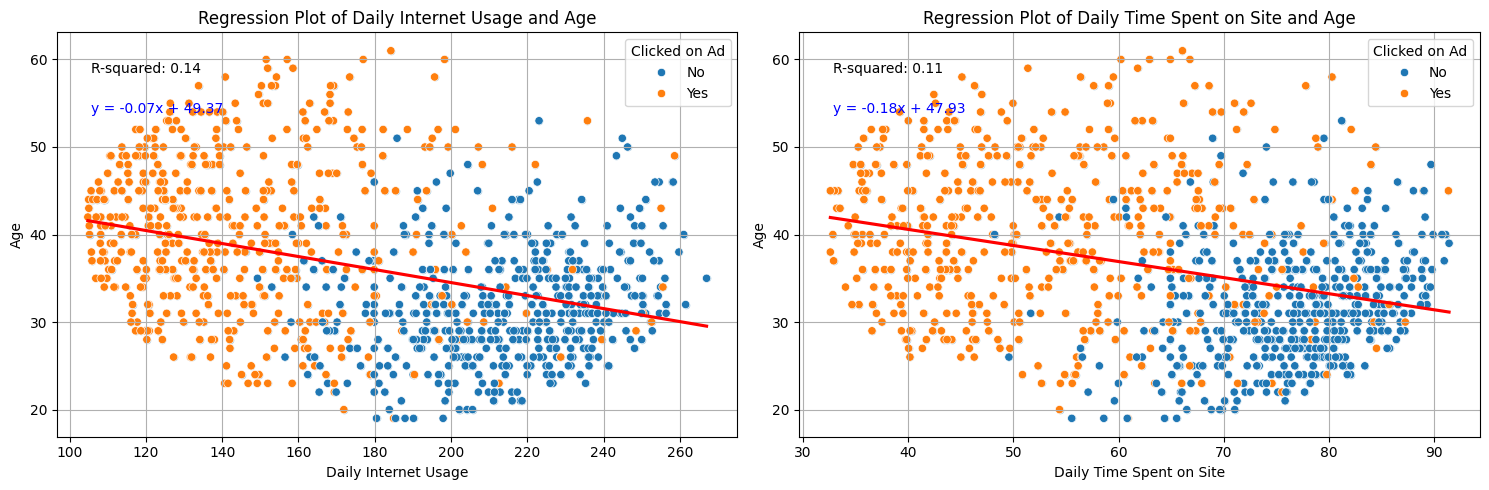

In [27]:
# Regplot of CVR vs Age, Daily Internet Usage, and Daily Time Spent on Site

# Function to calculate R-squared
def calculate_r_squared(x, y, y_pred):
    ss_residual = np.sum((y - y_pred) ** 2)
    ss_total = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

included_col = ['Daily Internet Usage', 'Daily Time Spent on Site']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax = ax.flatten()

for i, col in enumerate(included_col):
    # Regression plot
    sns.regplot(data=df, ax=ax[i], x=col, y='Age', scatter_kws={'s':20, 'alpha':0.4}, line_kws={'color':'red'}, ci=False)

    # Scatterplot
    sns.scatterplot(data=df, ax=ax[i], x=col, y='Age', hue='Clicked on Ad')

    # Calculating and displaying R-squared
    x = df[col]
    y = df['Age']
    slope, intercept = np.polyfit(x, y, 1)
    y_pred = slope * x + intercept
    r_squared = calculate_r_squared(x, y, y_pred)
    ax[i].text(0.05, 0.9, f'R-squared: {r_squared:.2f}', transform=ax[i].transAxes)

    # Displaying regression equation
    ax[i].annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=10, color='blue')

    ax[i].set_title(f'Regression Plot of {col} and Age')
    ax[i].grid(True)
    
plt.tight_layout()
plt.show()

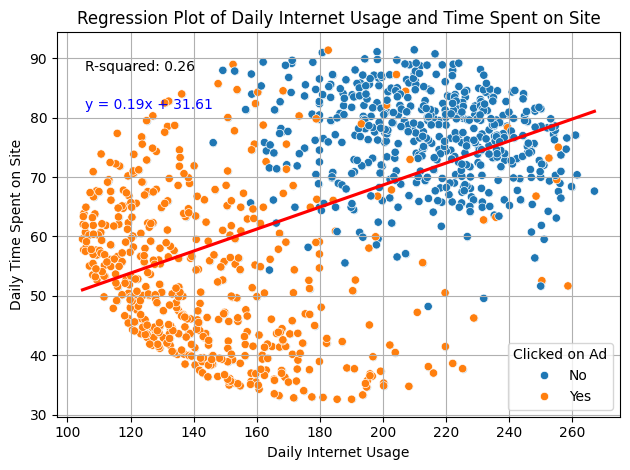

In [28]:
# Regplot of Daily Internet Usage  Daily and Time Spent on Site

# Function to calculate R-squared
def calculate_r_squared(x, y, y_pred):
    ss_residual = np.sum((y - y_pred) ** 2)
    ss_total = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

regplot = sns.regplot(data=df, x='Daily Internet Usage', y='Daily Time Spent on Site', scatter_kws={'s':20, 'alpha':0.3}, line_kws={'color':'red'}, ci=False)
sns.scatterplot(data=df, x='Daily Internet Usage', y='Daily Time Spent on Site', hue='Clicked on Ad')

# Calculating and displaying R-squared
x = df['Daily Internet Usage']
y = df['Daily Time Spent on Site']
slope, intercept = np.polyfit(x, y, 1)
y_pred = slope * x + intercept
r_squared = calculate_r_squared(x, y, y_pred)

plt.text(0.05, 0.9, f'R-squared: {r_squared:.2f}', transform=regplot.transAxes)
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=10, color='blue')
plt.title(f'Regression Plot of Daily Internet Usage and Time Spent on Site')
plt.grid(True)
    
plt.tight_layout()
plt.show()

Concept Reminder :
- A low R-squared value (close to 0) suggests that the independent variable(s) does not explain much of the variability in the dependent variable, indicating a weak relationship.
- An R-squared value around 0.11 could be considered a weak to modest relationship.

**Major Findings :**
- Age is slightly negatively correlated with Daily Internet Usage. Older customers spend less time on the internet on average compared to younger customers.
- Age is also slightly negatively correlated with Daily Time Spent on Site.
- Internet usage is slightly positively correlated with time spent on site. But there is a quite clear separation between two clusters of data. One cluster is less active and the other more so. Less active customers have a higher tendency to click on an ad compared to more active customers.

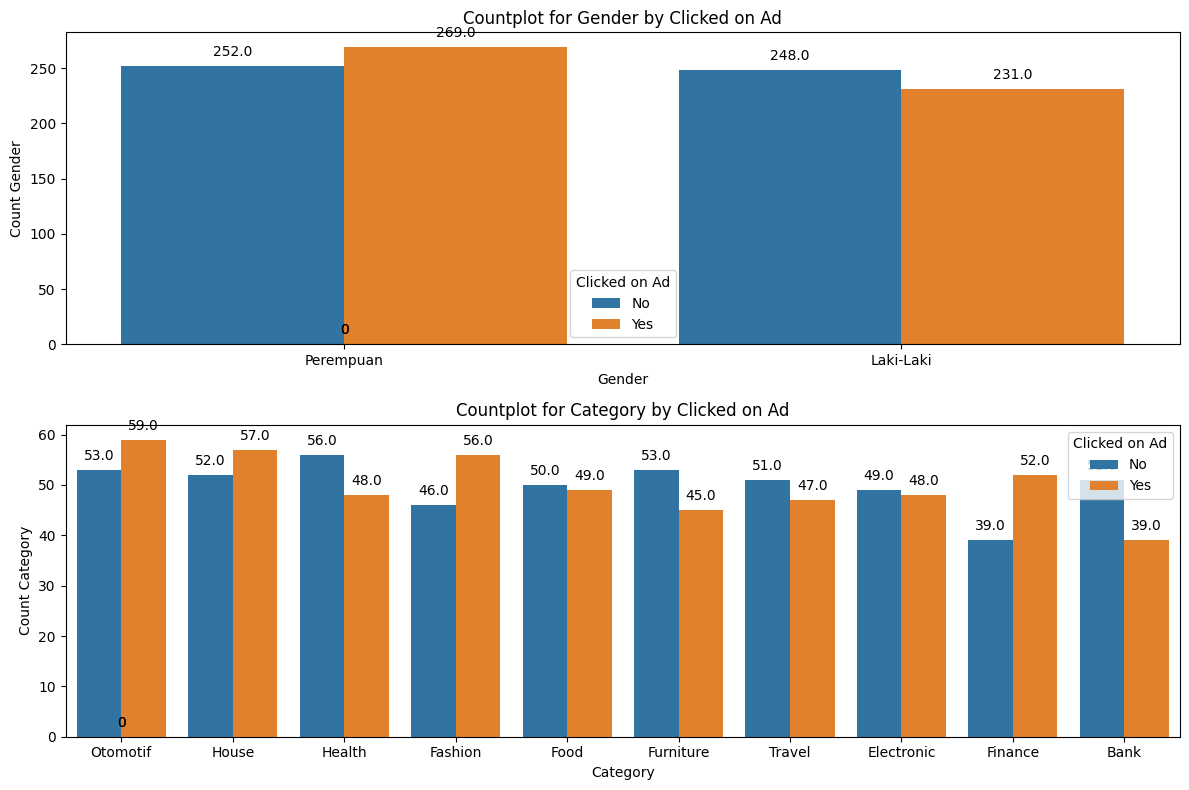

In [29]:
# Categorical Countplot with hue target (only for gender and category)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
ax = ax.flatten()

cats_cols_few = ['Gender', 'Category']

for i, col in enumerate(cats_cols_few):
    sns.countplot(data=df, x=col, ax=ax[i], order=df[col].value_counts().index, hue='Clicked on Ad')
    ax[i].set_title(f'Countplot for {col} by Clicked on Ad')
    ax[i].set_ylabel(f'Count {col}')
    ax[i].tick_params(axis='x')
    
    # Adding annotations on top of each bar
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

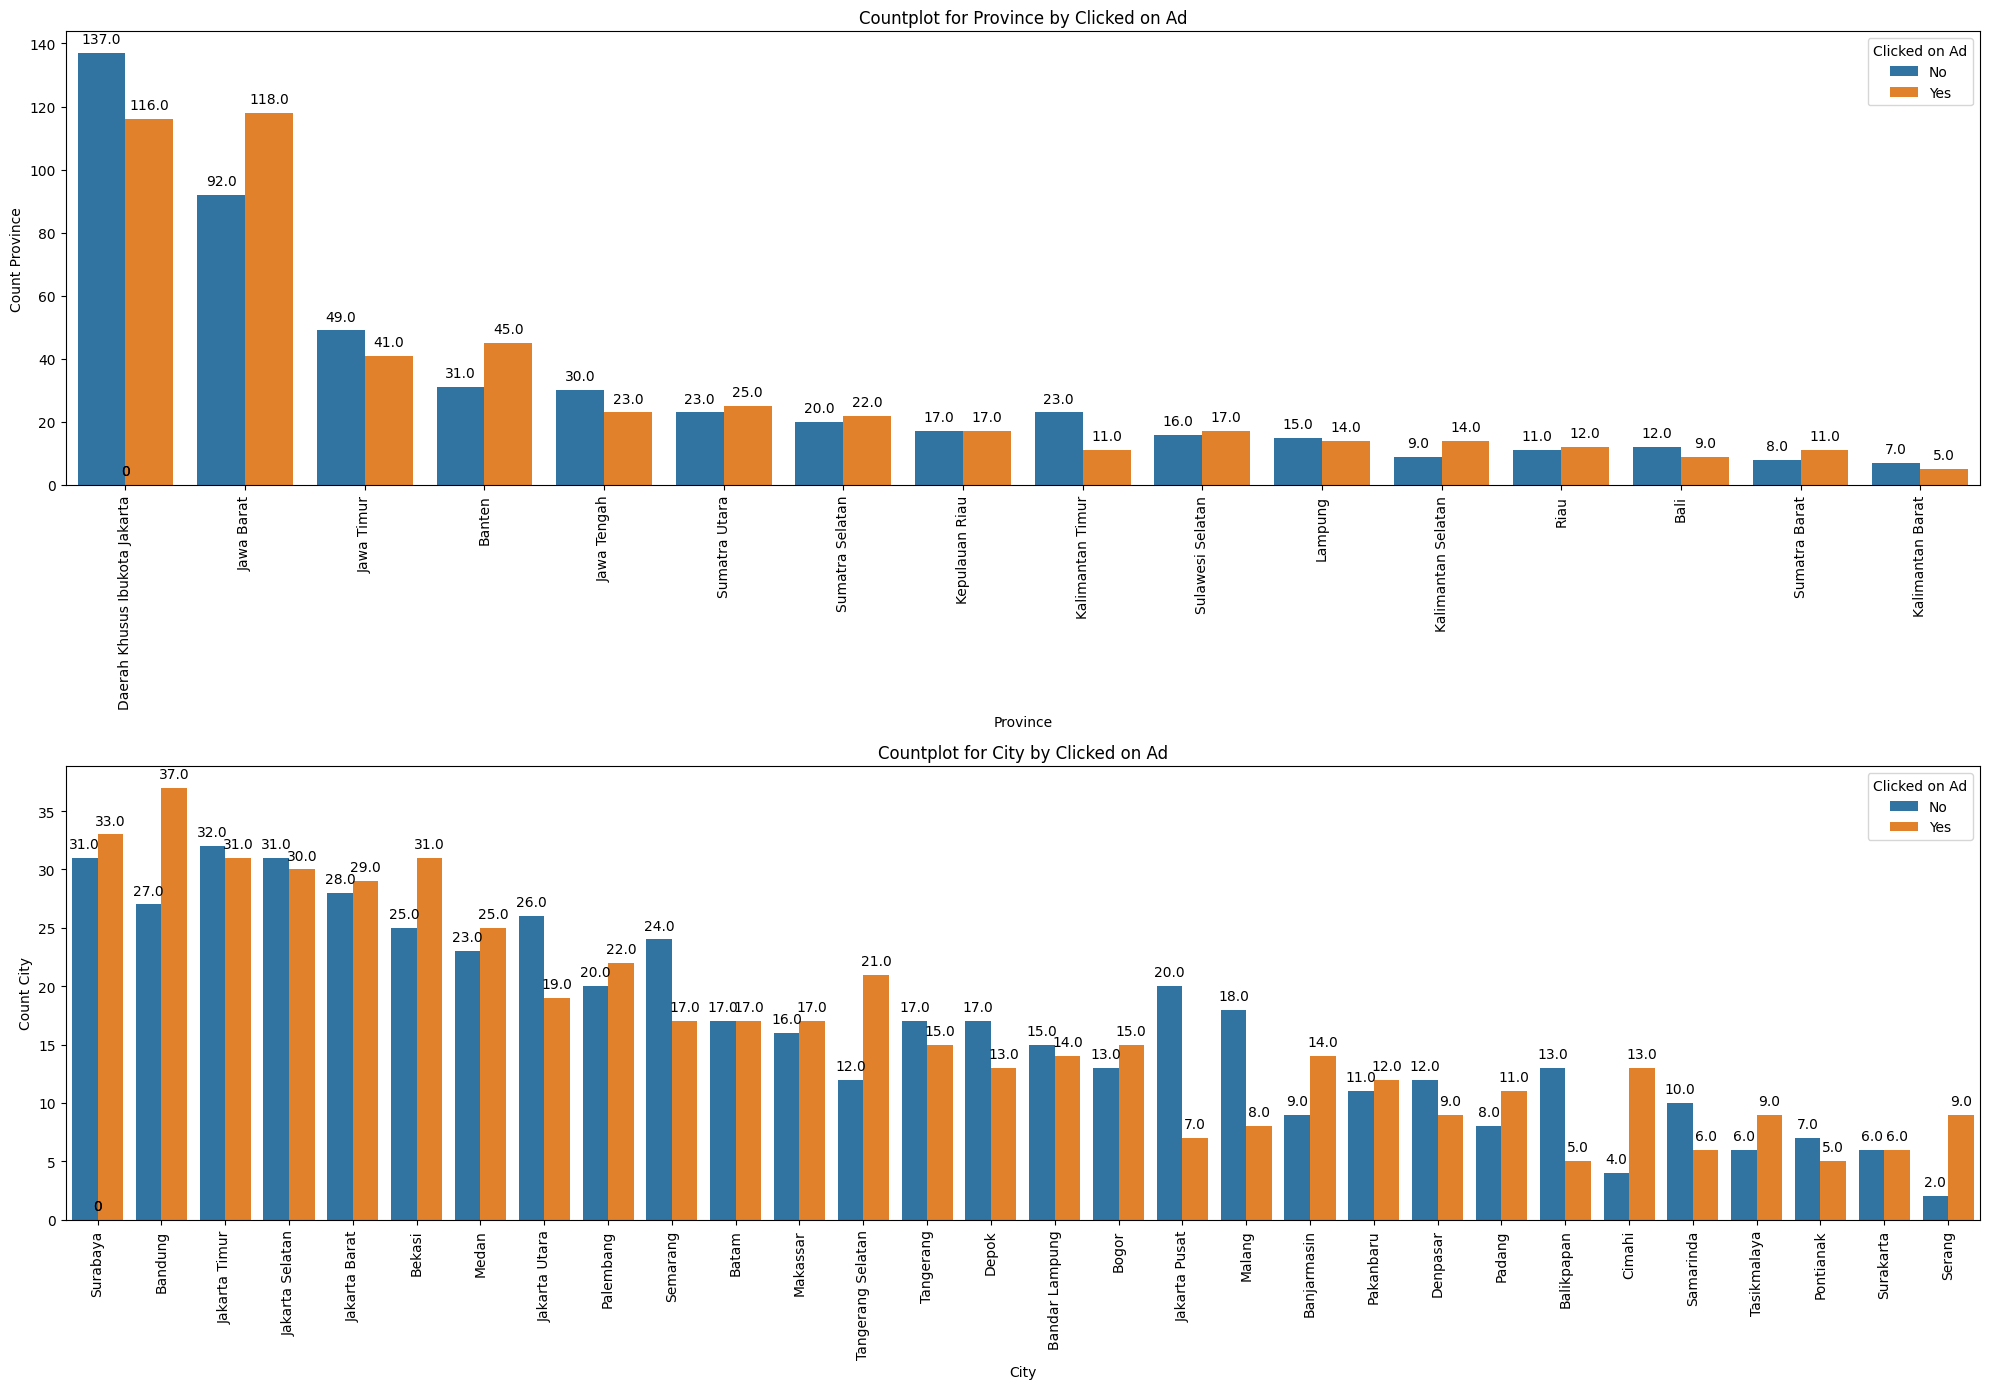

In [30]:
# Categorical Countplot with hue target (for Province and City)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 14))
ax = ax.flatten()

cats_cols_many = ['Province', 'City']

for i, col in enumerate(cats_cols_many):
    sns.countplot(data=df, x=col, ax=ax[i], order=df[col].value_counts().index, hue='Clicked on Ad')
    ax[i].set_title(f'Countplot for {col} by Clicked on Ad')
    ax[i].set_ylabel(f'Count {col}')
    ax[i].tick_params(axis='x', rotation=90)
    
    # Adding annotations on top of each bar
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

**Major Findings :**

- Females clicked on an ad slightly more than males overall even though the difference is not significant
- Ad categories click rates are pretty equal with none below 40% and none above 60%.
- Province with the highest amount of click on ad is Jawa Barat, while the lowest is Kalimantan Barat.
- City with the highest amount of click on ad is Bandung, while the lowest are Balikpapan and Pontianak.

## Multivariate Analysis

As we have seen from the regression plot before that the numerical distribution is not linear, so we use methods of calculating the correlation that can capture non-linear relationship better.

**Reminder About Correlation Method**

If you have a non-linear distribution of your numerical features, using Pearson correlation may not capture the full extent of the relationship between variables because Pearson correlation measures linear relationships. In such cases, Spearman and Kendall correlations can be more appropriate alternatives as they are non-parametric measures and can capture monotonic relationships, which may better reflect non-linear associations.

Here's a brief overview of each correlation method and its suitability for different types of relationships:

1. **Pearson Correlation**:
   - Measures the linear relationship between two continuous variables.
   - Assumes that variables are normally distributed and have a linear relationship.
   - Sensitive to outliers.
   - Suitable for linear relationships.

2. **Spearman Correlation**:
   - Measures the strength and direction of monotonic relationships between two continuous or ordinal variables.
   - Does not assume linearity.
   - More robust to outliers compared to Pearson correlation.
   - Suitable for non-linear relationships.

3. **Kendall Correlation**:
   - Measures the strength and direction of ordinal relationships between two variables.
   - Does not assume linearity.
   - Less affected by outliers compared to Pearson correlation.
   - Suitable for non-linear relationships, especially when the data is ranked or ordinal.

In summary, if you suspect that your data has non-linear relationships, it's advisable to calculate both Spearman and Kendall correlations in addition to Pearson correlation to capture different aspects of the relationships. This allows you to have a more comprehensive understanding of the associations between variables. Additionally, visual exploration through scatter plots or other graphical techniques can also provide insights into the nature of the relationships between variables.

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features Using Spearman Method')

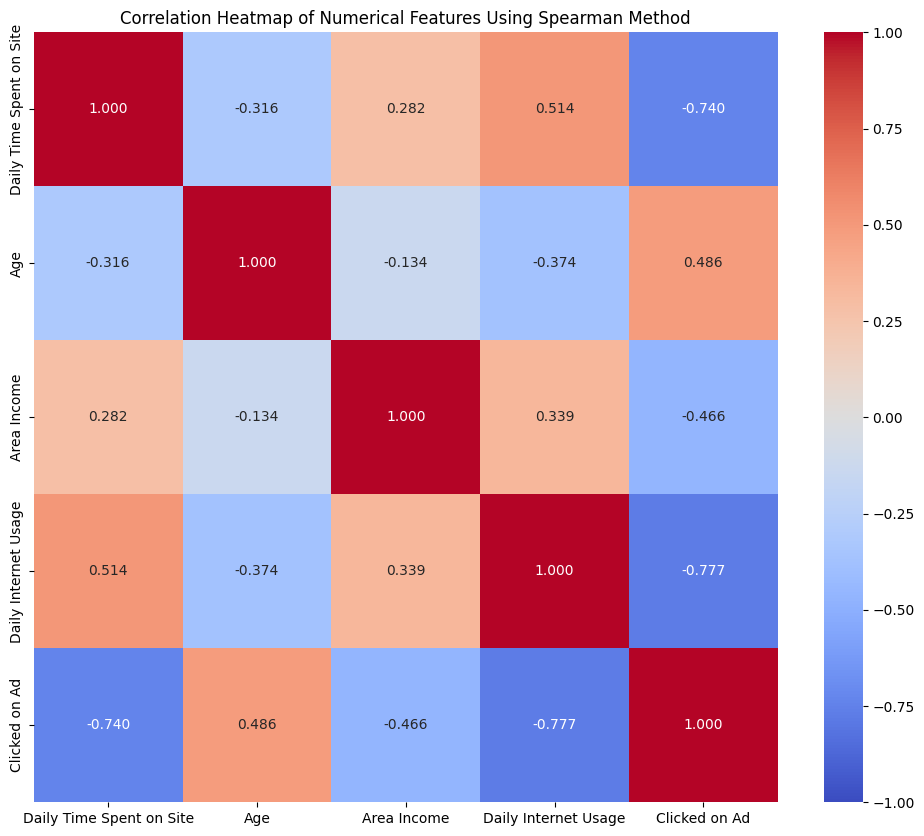

In [31]:
# Heatmap of numerical values (Spearman method)
df['Clicked on Ad'] = df['Clicked on Ad'].replace({'No' : 0, # Quick label encoding for target
                                                   'Yes' : 1})

plt.figure(figsize=(12,10))
sns.heatmap(data=df.corr(method='spearman', numeric_only=True),annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features Using Spearman Method')

In [32]:
# Feature-Feature correlation representation in tabular form 
corr_feature = df.corr(method='spearman', numeric_only=True)

# Flatten correlation matrix.
flat_cm = corr_feature.stack().reset_index()
flat_cm.columns = ['A', 'B', 'Corr Value']

flat_cm = flat_cm.loc[flat_cm['Corr Value'] < 1, :]
flat_cm = flat_cm[(flat_cm['A'] != 'Clicked on Ad') & (flat_cm['B'] != 'Clicked on Ad')]

flat_cm['Corr Type'] = flat_cm['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
flat_cm['Corr Value'] = flat_cm['Corr Value'].apply(lambda x : abs(x))
flat_cm = flat_cm.sort_values(by='Corr Value', ascending=False, ignore_index=True)

redundan_cm = flat_cm.drop_duplicates(subset=['Corr Value', 'Corr Type']).reset_index(drop=True)
redundan_cm

A                     B  Corr Value Corr Type
0  Daily Time Spent on Site  Daily Internet Usage    0.514424  Positive
1                       Age  Daily Internet Usage    0.374039  Negative
2               Area Income  Daily Internet Usage    0.339034  Positive
3  Daily Time Spent on Site                   Age    0.315546  Negative
4  Daily Time Spent on Site           Area Income    0.282280  Positive
5                       Age           Area Income    0.134418  Negative

In [33]:
# Feature-Target correlation representation in tabular form 
corr_target = df.corrwith(df['Clicked on Ad'], method='spearman', numeric_only=True)
corr = corr_target.reset_index(name='Corr Value')
corr = corr[corr['index'] != "Clicked on Ad"]
corr = corr.rename(columns={'index' : 'Feature'})

corr['Corr Type'] = corr['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
corr['Corr Value'] = corr['Corr Value'].apply(lambda x : abs(x))
corr = corr.sort_values('Corr Value', ascending=False, ignore_index=True)
corr

Feature  Corr Value Corr Type
0      Daily Internet Usage    0.777141  Negative
1  Daily Time Spent on Site    0.739857  Negative
2                       Age    0.486337  Positive
3               Area Income    0.466317  Negative

**Additional Information About Cramér's V**

Cramér's V is a measure of association between two categorical variables. It is an extension of the chi-square (χ²) test for independence and provides a way to quantify the strength of the association between categorical variables. Cramér's V ranges from 0 to 1, where 0 indicates no association, and 1 indicates a perfect association.

The formula for Cramér's V is:

\[ V = \sqrt{\frac{\chi^2}{n \cdot \min(k-1, r-1)}} \]

Where:
- \( \chi^2 \) is the chi-square statistic obtained from the contingency table,
- \( n \) is the total number of observations,
- \( k \) is the number of categories in one variable, and
- \( r \) is the number of categories in the other variable.

Cramér's V is commonly used for square contingency tables, but it can be applied to rectangular tables as well. It is particularly useful when dealing with nominal categorical variables and helps assess the strength of association between them. Keep in mind that Cramér's V is sensitive to table size, so its interpretation should be done with consideration of the specific context and domain knowledge.

Other references for categorical correlation : https://www.statology.org/correlation-between-categorical-variables/

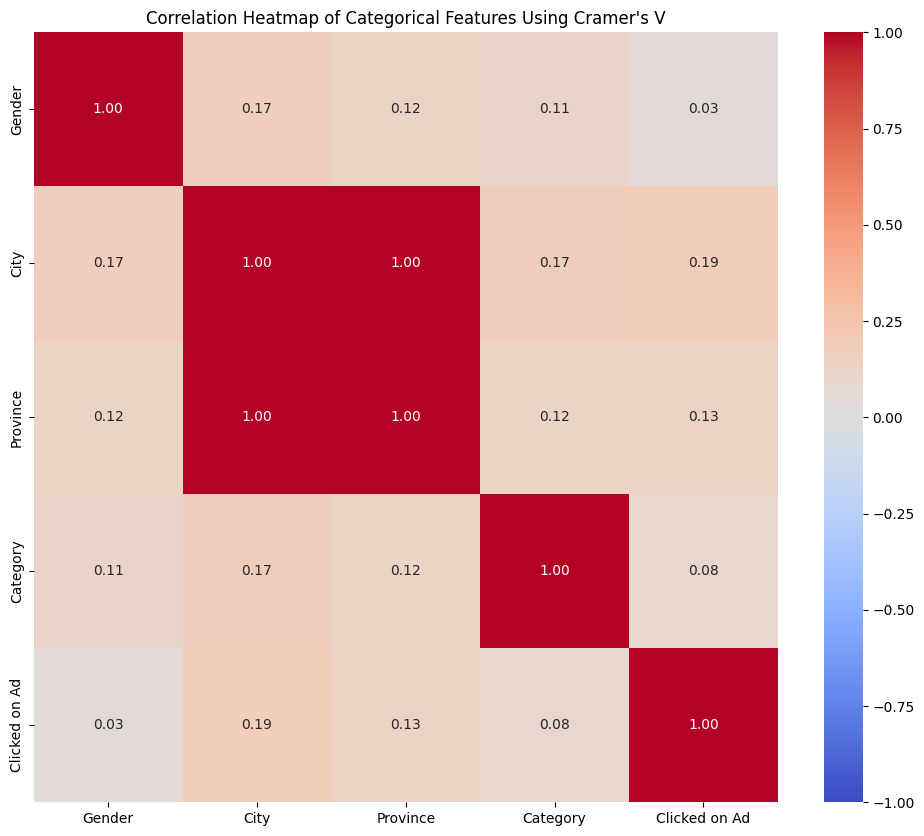

In [34]:
# Checking correlation of categorical features
from scipy import stats

def cramers_v(var1, var2):
    data = pd.crosstab(var1, var2).values
    chi_2 = stats.chi2_contingency(data)[0]
    n = data.sum()
    phi_2 = chi_2 / n
    r, k = data.shape
    return np.sqrt(phi_2 / min((k-1), (r-1)))

crv=[]
for i in range(len(cats_cols)):
  row=[]
  for j in range(len(cats_cols)):
    val = cramers_v(df[cats_cols[i]], df[cats_cols[j]])
    row.append(val)
  crv.append(row)
df_crv = pd.DataFrame(data=crv, columns=cats_cols, index=cats_cols)


plt.figure(figsize=(12, 10))
sns.heatmap(df_crv, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Categorical Features Using Cramer's V")
plt.show()

**Major Findings :**

- **Feature-to-feature correlation: (Highest to Lowest)**
    > **Numerical :**

    - `Daily Time Spent on Site` and `Daily Internet Usage` (0.51) have moderate positive relationship, suggesting that people who spend more time on the site tend to use the internet more, and vice versa, but the relationship might not be strictly linear.

    - `Age` and `Daily Internet Usage` (-0.37) have moderate negative relationship, meaning that the older the customer, the less their daily internet usage. This might be because younger individuals are more likely to be digitally active.

    - `Area Income` and `Daily Internet Usage` (0.34) have moderate positive relationship, indicating that people with higher area incomes tend to use the internet more on a daily basis. This could be because they have better access to technology and higher-speed internet connections.

    - `Daily Time Spent on Site` and `Age` (-0.31) have moderate negative relationship, suggesting that older users tend to spend less time on the site and that younger individuals may be more active on the site.

    - `Daily Time Spent on Site` and `Area Income` (0.28) have moderate positive relationship, whare this could mean that people with higher area income levels spend more time on the site.

    - `Age` and `Area Income` (-0.13) have low negative relationship, indication that the older the age of people the more the average income of that area, even though this is not necessarily laways the case.

    > **Categorical :**
    
    - All categorical features (non-encoded) `Gender`, `City`, `Province`, and `Category` have very weak relationship to each other


- **Feature-to-target correlation: (Highest to Lowest)**
    > **Numerical :**

    - `Daily Internet Usage` (-0.79) have strong negative relationship to `Clicked on Ad`. Suggesting that users who spend more time on the internet are less likely to click on the ad. This could imply that users who are more active internet users might be less responsive to online advertisements.  

    - `Daily Time Spent on Site` (0.74) also have strong negative relationship to `Clicked on Ad`. Meaning that users who spend more time on the site are less likely to click on the ad. This could mean that users who spend a lot of time on the site might be more engaged with the content and less likely to click on ads.

    - `Age` (0.48) have moderate positive relationship to `Clicked on Ad`. Meaning that adult/elderly users are more likely to clicked on Ad than younger users.

    - `Area Income` (0.46) have moderate negative relationship to `Clicked on Ad`. Users in areas with lower income levels are more likely to click on the ad.

    > **Categorical :**
    
    - All categorical features (non-encoded) `Gender`, `City`, `Province`, and `Category` have very weak relationship to `Clicked on Ad` target variable.

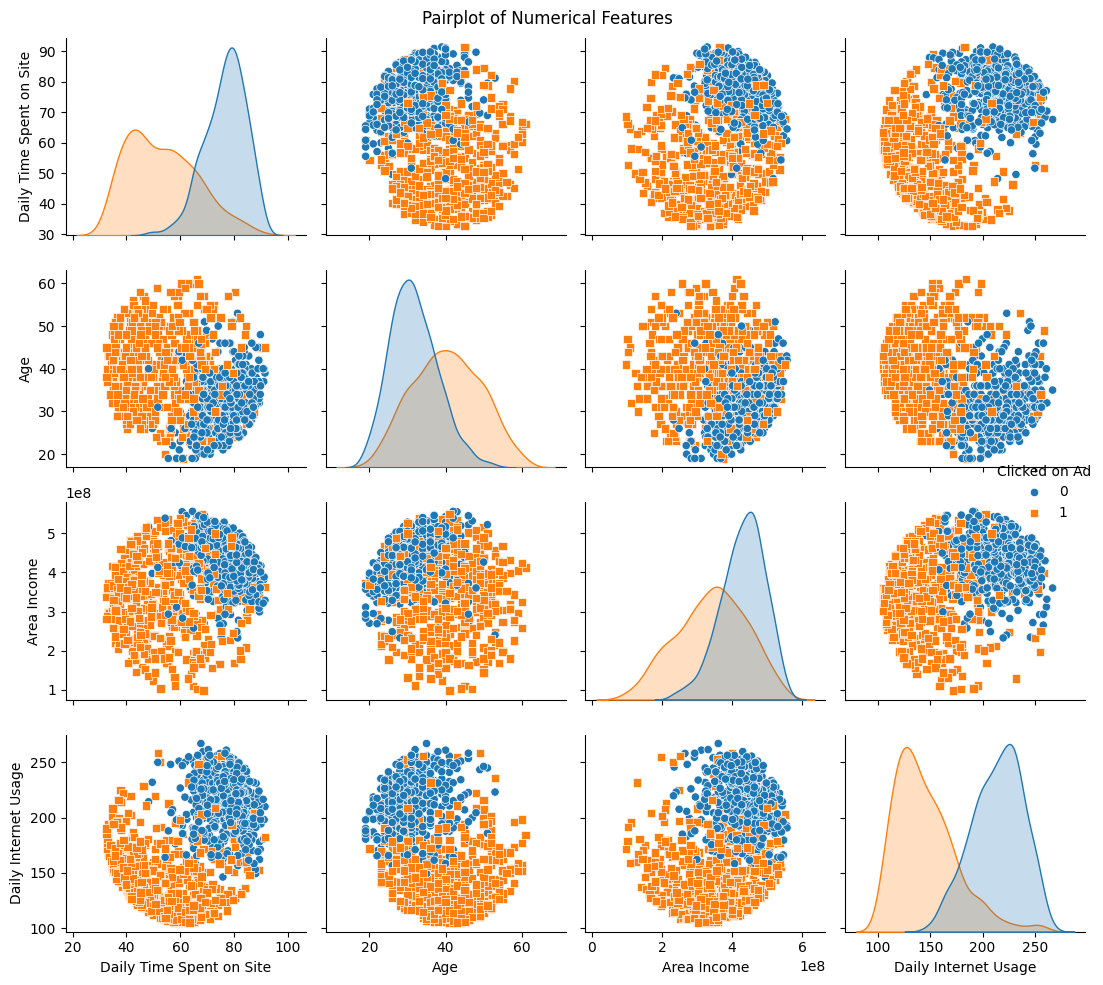

In [35]:
# Pairplot of numerical features
sns.pairplot(data=df, diag_kind='kde', hue='Clicked on Ad', markers=['o', 's'])
plt.suptitle('Pairplot of Numerical Features')
plt.tight_layout()
plt.show()

As explained before in regression plot that there are quite an interesting segmentation of target variable for each numerical features even though their correlation is not linear.

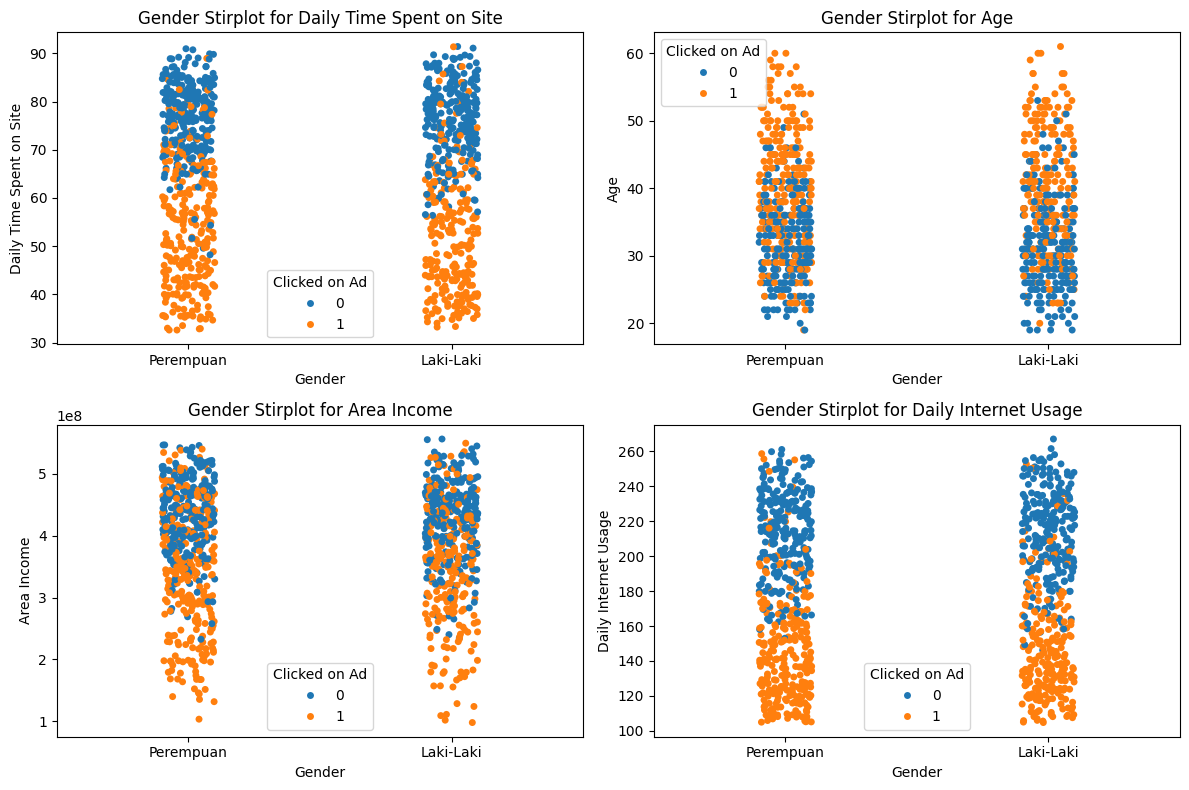

In [36]:
# Stripplot for Gender
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
ax = ax.flatten()

for i, col in enumerate(nums_cols):
    sns.stripplot(data=df, ax=ax[i], x='Gender', y=col, hue='Clicked on Ad')    
    ax[i].set_title(f'Gender Stirplot for {col}')

plt.tight_layout()
plt.show()

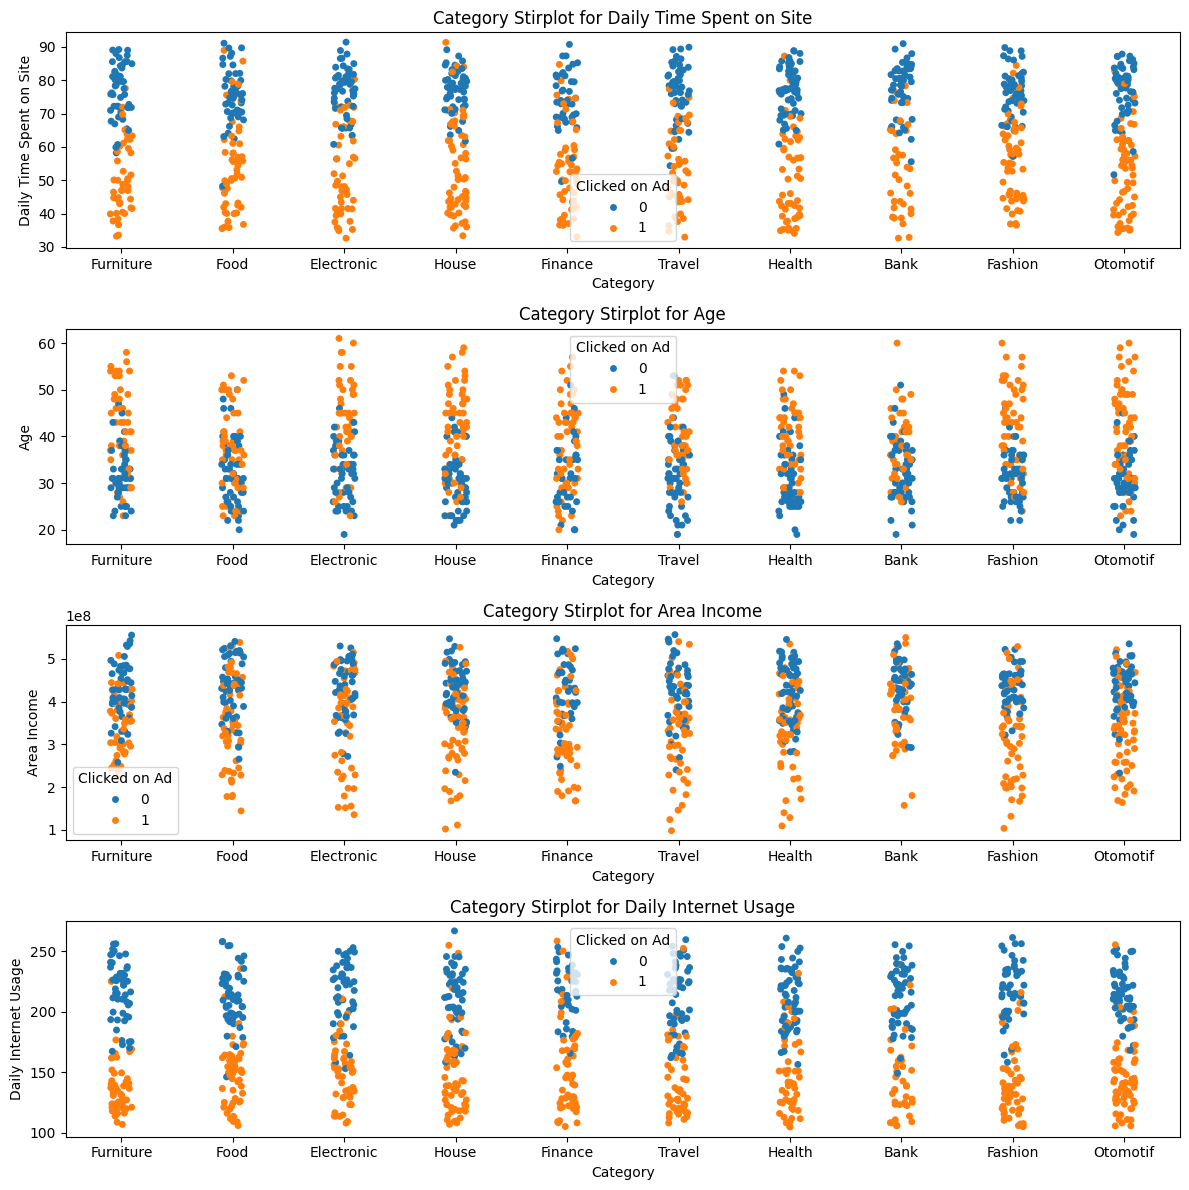

In [37]:
# Stripplot for Category
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
ax = ax.flatten()

for i, col in enumerate(nums_cols):
    sns.stripplot(data=df, ax=ax[i], x='Category', y=col, hue='Clicked on Ad')    
    ax[i].set_title(f'Category Stirplot for {col}')
    # ax[i].legend().remove()

plt.tight_layout()
plt.show()

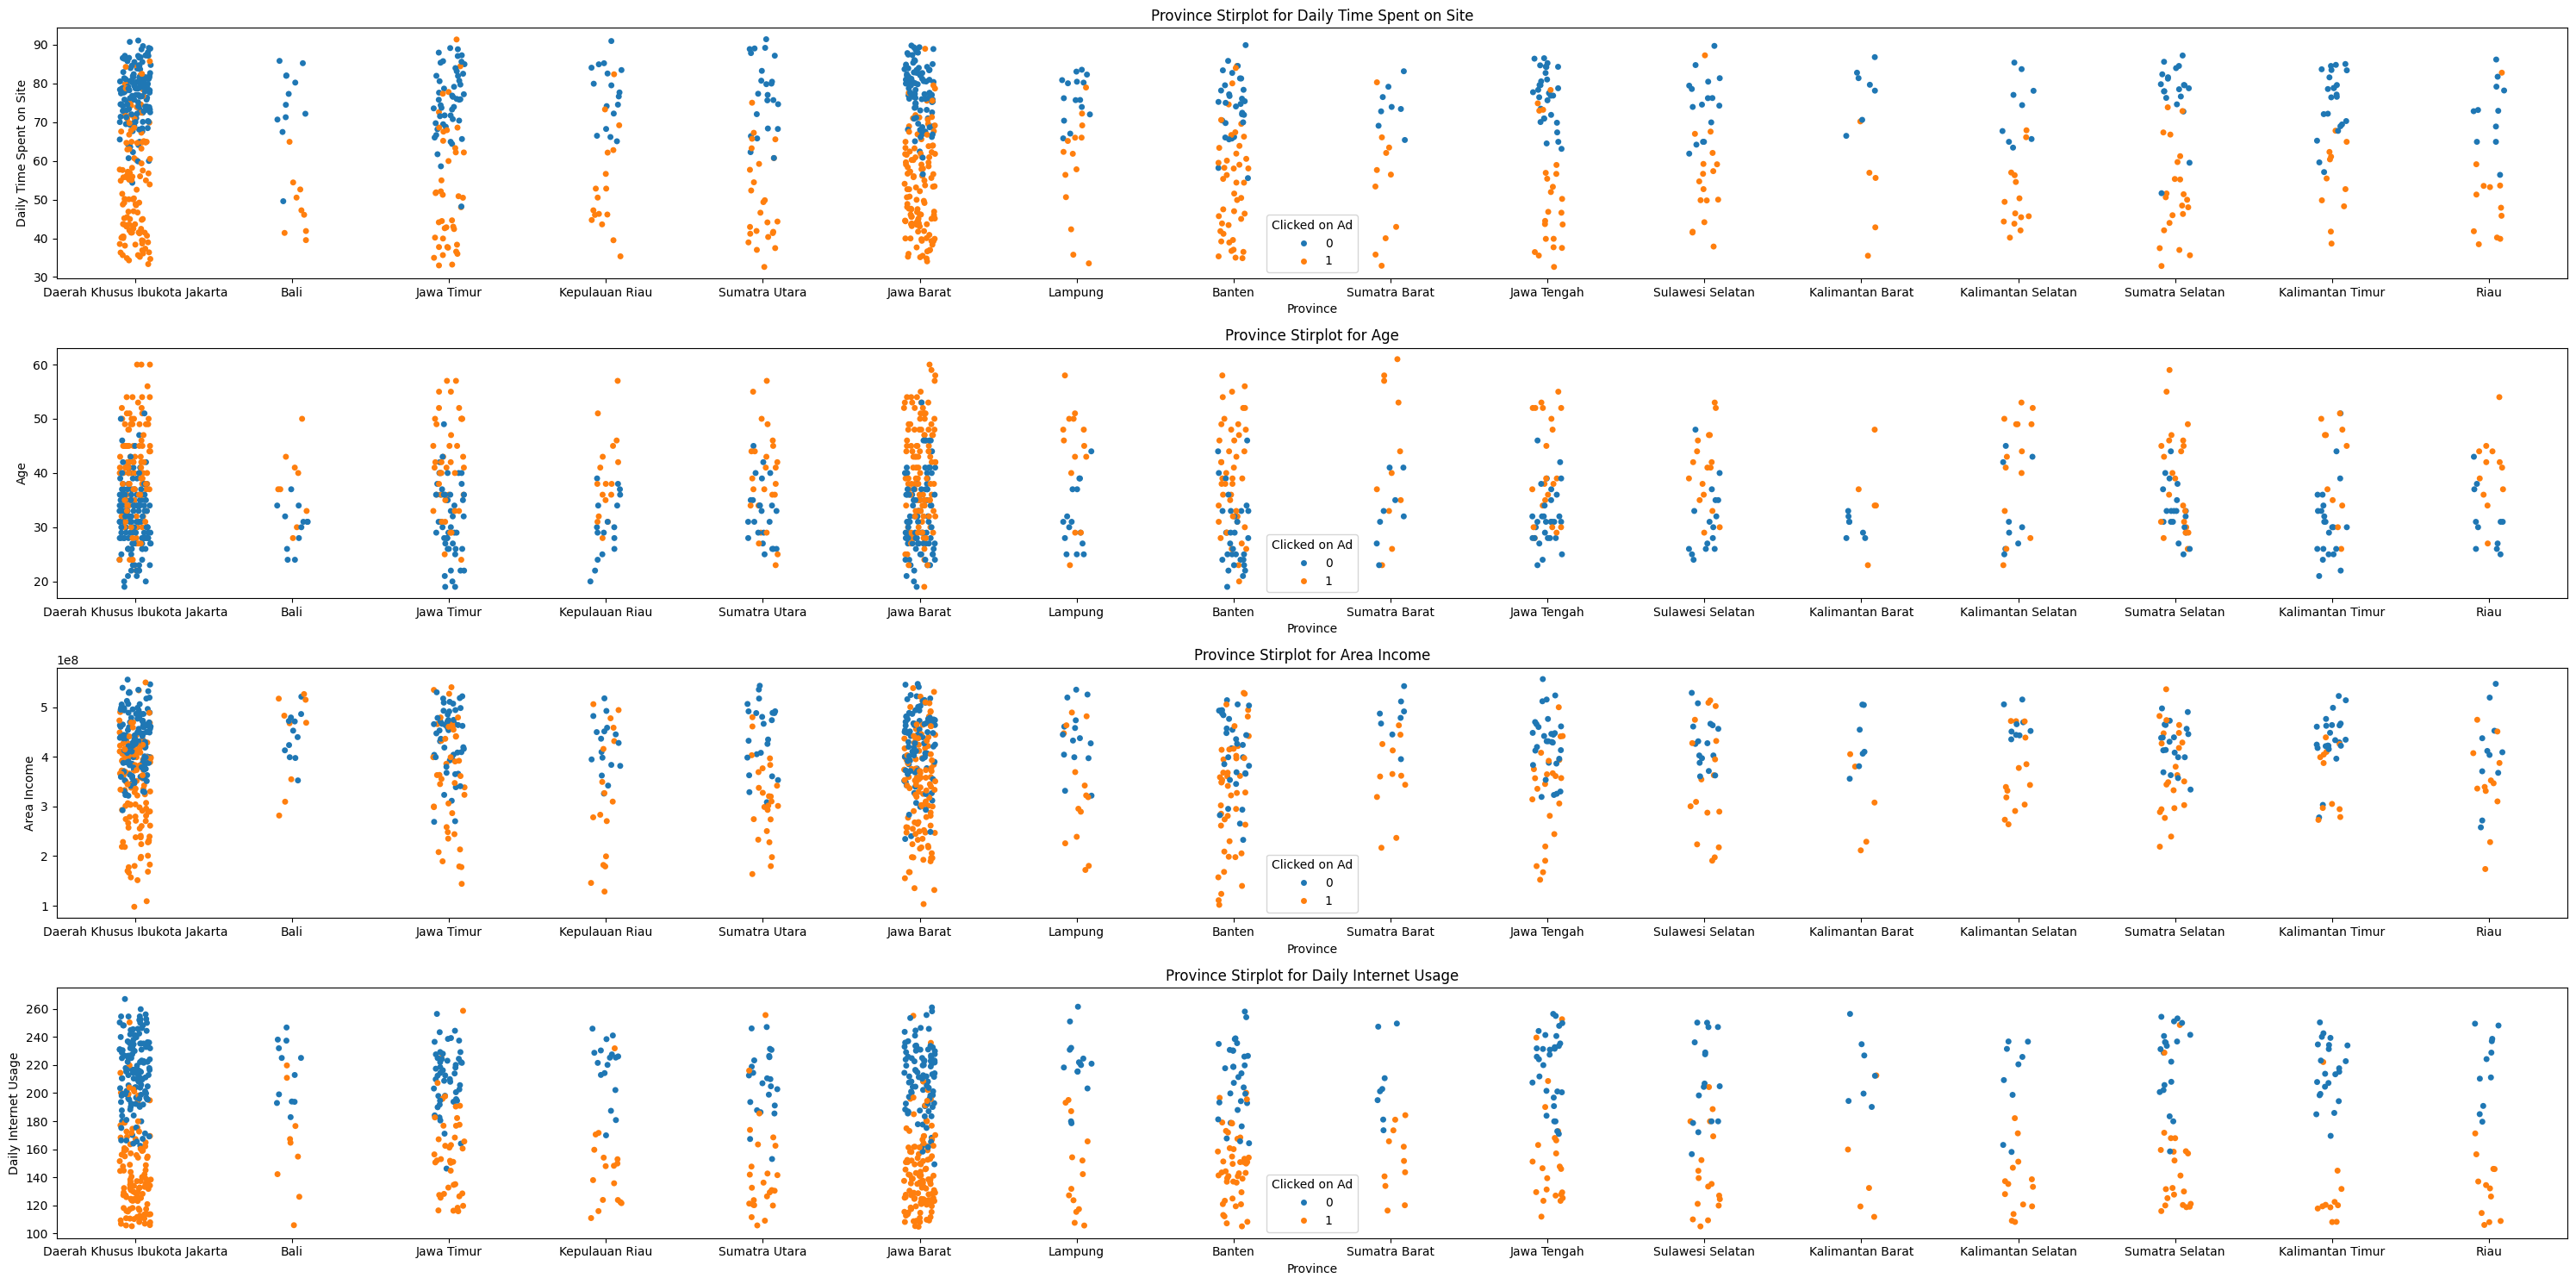

In [38]:
# Stripplot for Province
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(30, 15))
ax = ax.flatten()

for i, col in enumerate(nums_cols):
    sns.stripplot(data=df, ax=ax[i], x='Province', y=col, hue='Clicked on Ad')    
    ax[i].set_title(f'Province Stirplot for {col}')
    # ax[i].legend().remove()

plt.tight_layout()
plt.show()

**Major Findings :**

- There are no meaningful insight that we can extract for the distribution of data points in each category, because they all have the same pattern but just different amount of data. 

# **STAGE 2 : DATA PREPROCESSING**

## Feature Engineering

In [39]:
# Make a copy of original dataframe for preprocessing and encoding process
df_preprocessed = df.copy()
df_preprocessed.sample(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
474                     47.48   31  205514400.0                141.34   
400                     35.98   47  391955760.0                165.52   
940                     44.72   46  283279710.0                123.86   
421                     83.71   45  451948490.0                220.48   
809                     67.51   43  167598270.0                127.20   

        Gender          Visit Time               City            Province  \
474  Perempuan 2016-06-30 00:19:00  Tangerang Selatan              Banten   
400  Laki-Laki 2016-03-10 23:26:00             Malang          Jawa Timur   
940  Laki-Laki 2016-03-12 02:48:00              Batam      Kepulauan Riau   
421  Laki-Laki 2016-04-17 19:10:00        Banjarmasin  Kalimantan Selatan   
809  Perempuan 2016-04-29 14:10:00             Bekasi          Jawa Barat   

      Category  Clicked on Ad  
474   Otomotif              1  
400      House              1  
940  Furniture              1  
421   Otomotif              0  
809      House              1

### Age Group

The `Age Group` column is created by grouping the `Age` column. But first we need check the distribution of age to help with the grouping range.

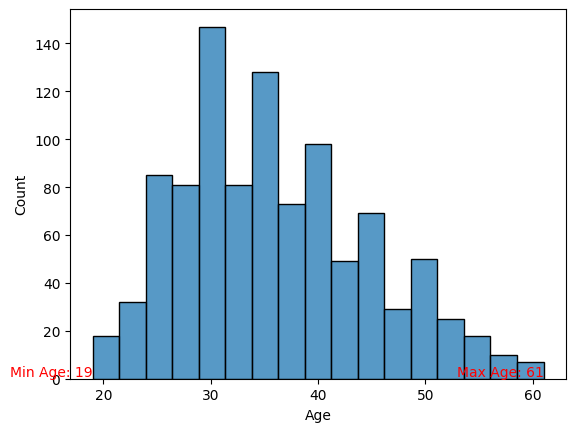

In [40]:
min_age = df_preprocessed['Age'].min()
max_age = df_preprocessed['Age'].max()

sns.histplot(data=df, x='Age')
plt.text(min_age, 0, f'Min Age: {min_age}', ha='right', va='bottom', color='red')
plt.text(max_age, 0, f'Max Age: {max_age}', ha='right', va='bottom', color='red')
plt.show()

In [41]:
# Age Group
def age_grouping(age) :
    if age >= 50 :
        group = 'Senior Adult'
    elif age >= 30 :
        group = 'Middle Adult'
    else :
        group = 'Young Adult'
    return group

df_preprocessed['Age Group'] = df_preprocessed['Age'].apply(age_grouping)

### Area Income Group

The `Area Income Group` column is created by grouping the `Area Income` column. Same as before procedure will be done for this column.

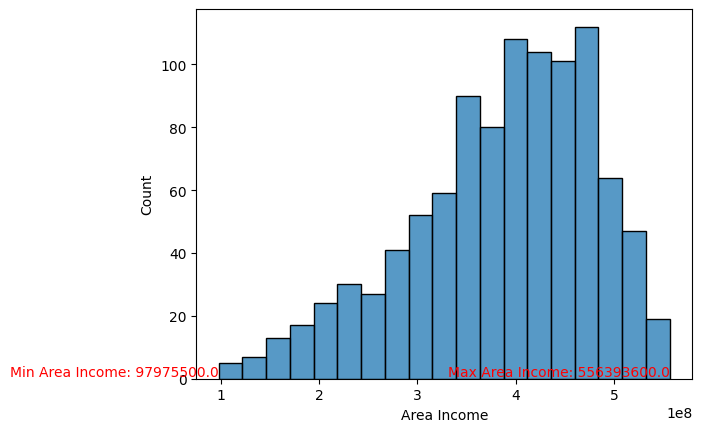

In [42]:
min_age = df_preprocessed['Area Income'].min()
max_age = df_preprocessed['Area Income'].max()

sns.histplot(data=df, x='Area Income')
plt.text(min_age, 0, f'Min Area Income: {min_age}', ha='right', va='bottom', color='red')
plt.text(max_age, 0, f'Max Area Income: {max_age}', ha='right', va='bottom', color='red')
plt.show()

Since the distribution is skewed, we will rely on quantiles for grouping.

In [43]:
q1 = np.percentile(df_preprocessed['Area Income'], 25)
q2 = np.percentile(df_preprocessed['Area Income'], 50)
q3 = np.percentile(df_preprocessed['Area Income'], 75)

def income_grouping(income):
    if income <= q1 :
        group = 'Low Income'
    elif income <= q2 :
        group = 'Medium-Low Income'
    elif income <= q3 :
        group = 'Medium-High Income'
    else :
        group = 'High Income'
    return group

df_preprocessed['Area Income Group'] = df_preprocessed['Area Income'].apply(income_grouping)

### Datetime Components Columns (Month, Day, etc)

In [44]:
df_preprocessed['Visit Time'].describe()

count                          1000
mean     2016-04-10 10:33:36.840000
min             2016-01-01 02:52:00
25%             2016-02-18 02:55:15
50%             2016-04-07 17:27:00
75%             2016-05-31 03:18:00
max             2016-07-24 00:22:00
Name: Visit Time, dtype: object

As we have discovered before that the data only have information of 6/7 months of campaign data. So we won't need to extract the year component.

**Reminder :**

For datetime extraction methods check here : https://pandas.pydata.org/docs/user_guide/timeseries.html#time-date-components

In [45]:
# Datetime component extraction
df_preprocessed['Visit Month'] = df_preprocessed['Visit Time'].dt.month
df_preprocessed['Visit Week'] = df_preprocessed['Visit Time'].dt.isocalendar().week
df_preprocessed['Visit Day'] = df_preprocessed['Visit Time'].dt.day
df_preprocessed['Visit Hour'] = df_preprocessed['Visit Time'].dt.hour
df_preprocessed['Is Visit Day Weekend'] = df_preprocessed['Visit Time'].dt.day_of_week.isin([5, 6]).astype(int)

However as for the week extraction using isocalendar() method, the numbering will assign week 0 as week 53, even though the data only has up until around week 30. This need to be handled by converting week 53 to week 0.

In [46]:
df_preprocessed[df_preprocessed['Visit Week'] == 53].sample(3)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
546                     78.77   28  444483340.0                211.83   
965                     35.25   50  329357140.0                194.44   
477                     44.96   50  369614000.0                132.71   

        Gender          Visit Time           City  \
546  Perempuan 2016-01-01 08:27:00       Semarang   
965  Perempuan 2016-01-03 04:39:00    Tasikmalaya   
477  Laki-Laki 2016-01-02 12:25:00  Jakarta Utara   

                          Province  Category  Clicked on Ad     Age Group  \
546                    Jawa Tengah      Food              0   Young Adult   
965                     Jawa Barat    Health              1  Senior Adult   
477  Daerah Khusus Ibukota Jakarta  Otomotif              1  Senior Adult   

      Area Income Group  Visit Month  Visit Week  Visit Day  Visit Hour  \
546  Medium-High Income            1          53          1           8   
965          Low Income            1          53          3           4   
477   Medium-Low Income            1          53          2          12   

     Is Visit Day Weekend  
546                     0  
965                     1  
477                     1

In [47]:
df_preprocessed['Visit Week'] = df_preprocessed['Visit Week'].apply(lambda x: 0 if x == 53 else x)
df_preprocessed['Visit Week'] = df_preprocessed['Visit Week'].astype(int)
df_preprocessed.sample(3)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
585                     78.60   46  292376910.0                254.59   
68                      75.74   25  427041090.0                215.25   
43                      81.38   31  454507270.0                212.30   

        Gender          Visit Time             City  \
585  Laki-Laki 2016-07-20 13:21:00  Jakarta Selatan   
68   Laki-Laki 2016-01-16 11:35:00   Bandar Lampung   
43   Perempuan 2016-02-08 00:23:00        Pontianak   

                          Province Category  Clicked on Ad     Age Group  \
585  Daerah Khusus Ibukota Jakarta     Bank              0  Middle Adult   
68                         Lampung  Fashion              0   Young Adult   
43                Kalimantan Barat    House              0  Middle Adult   

      Area Income Group  Visit Month  Visit Week  Visit Day  Visit Hour  \
585          Low Income            7          29         20          13   
68   Medium-High Income            1           2         16          11   
43   Medium-High Income            2           6          8           0   

     Is Visit Day Weekend  
585                     0  
68                      1  
43                      0

In [48]:
# Check distribution of weekend or not
df_preprocessed['Is Visit Day Weekend'].value_counts()

Is Visit Day Weekend
0    715
1    285
Name: count, dtype: int64

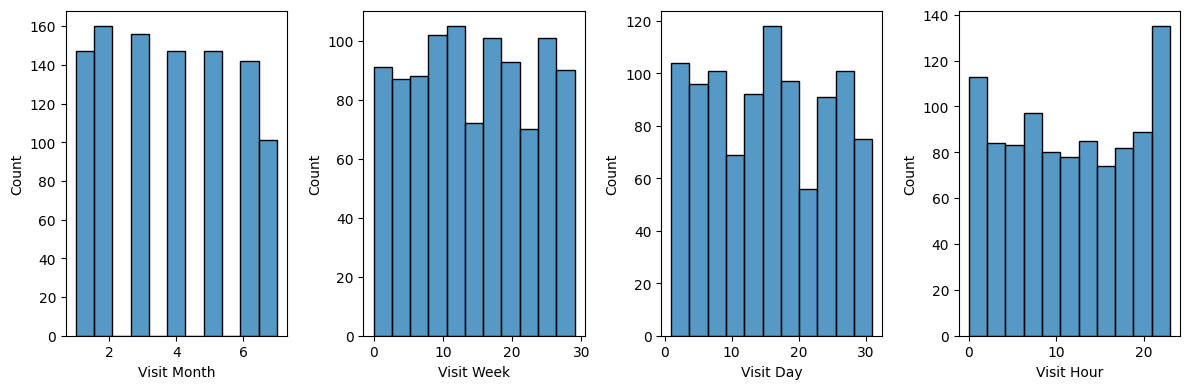

In [49]:
# Datetime component analysis
datetime_cols_analysis = ['Visit Month', 'Visit Week', 'Visit Day', 'Visit Hour']

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
ax = ax.flatten()

for i, col in enumerate(datetime_cols_analysis) :
    sns.histplot(data=df_preprocessed, ax=ax[i], x=col)

plt.tight_layout()
plt.show()

There are not much of a difference between the visit time component of our site. The distributions are uniform.

In [50]:
# Re-check dataframe after feature engineering process
df_preprocessed.sample(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
593                     82.07   24  352365510.0                193.97   
541                     75.65   39  448150850.0                247.90   
557                     79.67   28  410032840.0                226.79   
136                     38.37   36  288604120.0                140.46   
971                     45.17   48  240926630.0                132.07   

        Gender          Visit Time           City  \
593  Perempuan 2016-06-14 07:02:00       Denpasar   
541  Laki-Laki 2016-05-30 02:34:00       Semarang   
557  Perempuan 2016-07-20 01:56:00      Pontianak   
136  Perempuan 2016-05-13 06:09:00  Jakarta Timur   
971  Laki-Laki 2016-01-27 14:41:00  Jakarta Barat   

                          Province   Category  Clicked on Ad     Age Group  \
593                           Bali      House              0   Young Adult   
541                    Jawa Tengah  Furniture              0  Middle Adult   
557               Kalimantan Barat      House              0   Young Adult   
136  Daerah Khusus Ibukota Jakarta    Finance              1  Middle Adult   
971  Daerah Khusus Ibukota Jakarta     Travel              1  Middle Adult   

      Area Income Group  Visit Month  Visit Week  Visit Day  Visit Hour  \
593   Medium-Low Income            6          24         14           7   
541  Medium-High Income            5          22         30           2   
557  Medium-High Income            7          29         20           1   
136          Low Income            5          19         13           6   
971          Low Income            1           4         27          14   

     Is Visit Day Weekend  
593                     0  
541                     0  
557                     0  
136                     0  
971                     0

## Handling Outliers

In [51]:
# Outlier handling and create outliers-filtered new dataframe

print(f'Rows before removing outliers: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['Area Income']:
    Q1 = df_preprocessed[col].quantile(0.25)
    Q3 = df_preprocessed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filtered_entries = ((df_preprocessed[col] >= lower_bound) & (df_preprocessed[col] <= upper_bound)) & filtered_entries
    
df_preprocessed = df_preprocessed[filtered_entries]

print(f'Rows after removing outliers: {len(df_preprocessed)}')

df_preprocessed

Rows before removing outliers: 1000
Rows after removing outliers: 991


Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                   68.950000   35  432837300.0                256.09   
1                   80.230000   31  479092950.0                193.77   
2                   69.470000   26  418501580.0                236.50   
3                   74.150000   29  383643260.0                245.89   
4                   68.370000   35  517229930.0                225.58   
..                        ...  ...          ...                   ...   
995                 72.970000   30  499691990.0                208.58   
996                 51.300000   45  474475190.0                134.42   
997                 64.929524   51  296910040.0                120.37   
998                 55.550000   19  293445530.0                187.95   
999                 45.010000   26  209130600.0                178.35   

        Gender          Visit Time           City  \
0    Perempuan 2016-03-27 00:53:00  Jakarta Timur   
1    Laki-Laki 2016-04-04 01:39:00       Denpasar   
2    Perempuan 2016-03-13 20:35:00       Surabaya   
3    Laki-Laki 2016-01-10 02:31:00          Batam   
4    Perempuan 2016-06-03 03:36:00          Medan   
..         ...                 ...            ...   
995  Laki-Laki 2016-02-11 21:49:00       Semarang   
996  Laki-Laki 2016-04-22 02:07:00      Pakanbaru   
997  Laki-Laki 2016-02-01 17:24:00      Samarinda   
998  Perempuan 2016-03-24 02:35:00      Tangerang   
999  Perempuan 2016-06-03 21:43:00         Serang   

                          Province    Category  Clicked on Ad     Age Group  \
0    Daerah Khusus Ibukota Jakarta   Furniture              0  Middle Adult   
1                             Bali        Food              0  Middle Adult   
2                       Jawa Timur  Electronic              0   Young Adult   
3                   Kepulauan Riau       House              0   Young Adult   
4                    Sumatra Utara     Finance              0  Middle Adult   
..                             ...         ...            ...           ...   
995                    Jawa Tengah     Finance              1  Middle Adult   
996                           Riau  Electronic              1  Middle Adult   
997               Kalimantan Timur      Travel              1  Senior Adult   
998                         Banten        Bank              0   Young Adult   
999                         Banten      Travel              1   Young Adult   

      Area Income Group  Visit Month  Visit Week  Visit Day  Visit Hour  \
0    Medium-High Income            3          12         27           0   
1           High Income            4          14          4           1   
2    Medium-High Income            3          10         13          20   
3     Medium-Low Income            1           1         10           2   
4           High Income            6          22          3           3   
..                  ...          ...         ...        ...         ...   
995         High Income            2           6         11          21   
996         High Income            4          16         22           2   
997          Low Income            2           5          1          17   
998          Low Income            3          12         24           2   
999          Low Income            6          22          3          21   

     Is Visit Day Weekend  
0                       1  
1                       0  
2                       1  
3                       1  
4                       0  
..                    ...  
995                     0  
996                     0  
997                     0  
998                     0  
999                     0  

[991 rows x 17 columns]

## Feature Encoding

In [52]:
# Re-check the unique values of categorical features to determine encoding technique
encoded_features = ['Gender', 'City', 'Province', 'Category', 'Age Group', 'Area Income Group']

for col in encoded_features :
    print(f'======={col}=======')
    print(df_preprocessed[col].unique())
    print()

=======Gender=======
['Perempuan' 'Laki-Laki']

=======City=======
['Jakarta Timur' 'Denpasar' 'Surabaya' 'Batam' 'Medan' 'Jakarta Barat'
 'Bandung' 'Bandar Lampung' 'Jakarta Pusat' 'Depok' 'Serang' 'Padang'
 'Semarang' 'Makassar' 'Malang' 'Jakarta Utara' 'Pontianak'
 'Jakarta Selatan' 'Tasikmalaya' 'Surakarta' 'Bekasi' 'Tangerang' 'Cimahi'
 'Banjarmasin' 'Palembang' 'Samarinda' 'Pakanbaru' 'Tangerang Selatan'
 'Bogor' 'Balikpapan']

=======Province=======
['Daerah Khusus Ibukota Jakarta' 'Bali' 'Jawa Timur' 'Kepulauan Riau'
 'Sumatra Utara' 'Jawa Barat' 'Lampung' 'Banten' 'Sumatra Barat'
 'Jawa Tengah' 'Sulawesi Selatan' 'Kalimantan Barat' 'Kalimantan Selatan'
 'Sumatra Selatan' 'Kalimantan Timur' 'Riau']

=======Category=======
['Furniture' 'Food' 'Electronic' 'House' 'Finance' 'Travel' 'Health'
 'Bank' 'Fashion' 'Otomotif']

=======Age Group=======
['Middle Adult' 'Young Adult' 'Senior Adult']

=======Area Income Group=======
['Medium-High Income' 'High Income' 'Medium-Low Income' '

In [53]:
# Label encoding for Gender, Age Group, and Area Income Group
df_preprocessed['Gender'] = df_preprocessed['Gender'].replace({'Perempuan' : 0,
                                                                'Laki-Laki' : 1})


df_preprocessed['Age Group'] = df_preprocessed['Age Group'].replace({'Young Adult' : 0,
                                                                    'Middle Adult' : 1,
                                                                    'Senior Adult' : 2})

df_preprocessed['Area Income Group'] = df_preprocessed['Area Income Group'].replace({'Low Income' : 0,
                                                                                    'Medium-Low Income' : 1,
                                                                                    'Medium-High Income' : 2,
                                                                                    'High Income' : 3})

In [54]:
# One-hot encoding for City, Province, and Category
one_hot_columns = ['City', 'Province', 'Category']

for col in one_hot_columns :
    onehots = pd.get_dummies(df_preprocessed[col], prefix=col)
    onehots = onehots.astype(int)
    df_preprocessed = pd.concat([df_preprocessed, onehots], axis=1)

# Drop the original columns after one-hot encoding
df_preprocessed.drop(one_hot_columns, axis=1, inplace=True)

In [55]:
# Re-check final dataframe after encoding process
df_preprocessed

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Gender  \
0                   68.950000   35  432837300.0                256.09       0   
1                   80.230000   31  479092950.0                193.77       1   
2                   69.470000   26  418501580.0                236.50       0   
3                   74.150000   29  383643260.0                245.89       1   
4                   68.370000   35  517229930.0                225.58       0   
..                        ...  ...          ...                   ...     ...   
995                 72.970000   30  499691990.0                208.58       1   
996                 51.300000   45  474475190.0                134.42       1   
997                 64.929524   51  296910040.0                120.37       1   
998                 55.550000   19  293445530.0                187.95       0   
999                 45.010000   26  209130600.0                178.35       0   

             Visit Time  Clicked on Ad  Age Group  Area Income Group  \
0   2016-03-27 00:53:00              0          1                  2   
1   2016-04-04 01:39:00              0          1                  3   
2   2016-03-13 20:35:00              0          0                  2   
3   2016-01-10 02:31:00              0          0                  1   
4   2016-06-03 03:36:00              0          1                  3   
..                  ...            ...        ...                ...   
995 2016-02-11 21:49:00              1          1                  3   
996 2016-04-22 02:07:00              1          1                  3   
997 2016-02-01 17:24:00              1          2                  0   
998 2016-03-24 02:35:00              0          0                  0   
999 2016-06-03 21:43:00              1          0                  0   

     Visit Month  Visit Week  Visit Day  Visit Hour  Is Visit Day Weekend  \
0              3          12         27           0                     1   
1              4          14          4           1                     0   
2              3          10         13          20                     1   
3              1           1         10           2                     1   
4              6          22          3           3                     0   
..           ...         ...        ...         ...                   ...   
995            2           6         11          21                     0   
996            4          16         22           2                     0   
997            2           5          1          17                     0   
998            3          12         24           2                     0   
999            6          22          3          21                     0   

     City_Balikpapan  City_Bandar Lampung  City_Bandung  City_Banjarmasin  \
0                  0                    0             0                 0   
1                  0                    0             0                 0   
2                  0                    0             0                 0   
3                  0                    0             0                 0   
4                  0                    0             0                 0   
..               ...                  ...           ...               ...   
995                0                    0             0                 0   
996                0                    0             0                 0   
997                0                    0             0                 0   
998                0                    0             0                 0   
999                0                    0             0                 0   

     City_Batam  City_Bekasi  City_Bogor  City_Cimahi  City_Denpasar  \
0             0            0           0            0              0   
1             0            0           0            0              1   
2             0            0           0            0              0   
3             1            0 

## Feature Selection

In [56]:
# Drop Visit Time column (unnecessary for furhter processes)
df_preprocessed.drop(columns='Visit Time', inplace=True)

In [57]:
# Re-arrange the columns (Clicked on Ad in last)
df_1 = df_preprocessed.drop(columns='Clicked on Ad')
df_2 = df_preprocessed['Clicked on Ad']
df_preprocessed = pd.concat([df_1, df_2], axis='columns')

### Correlation Heatmap

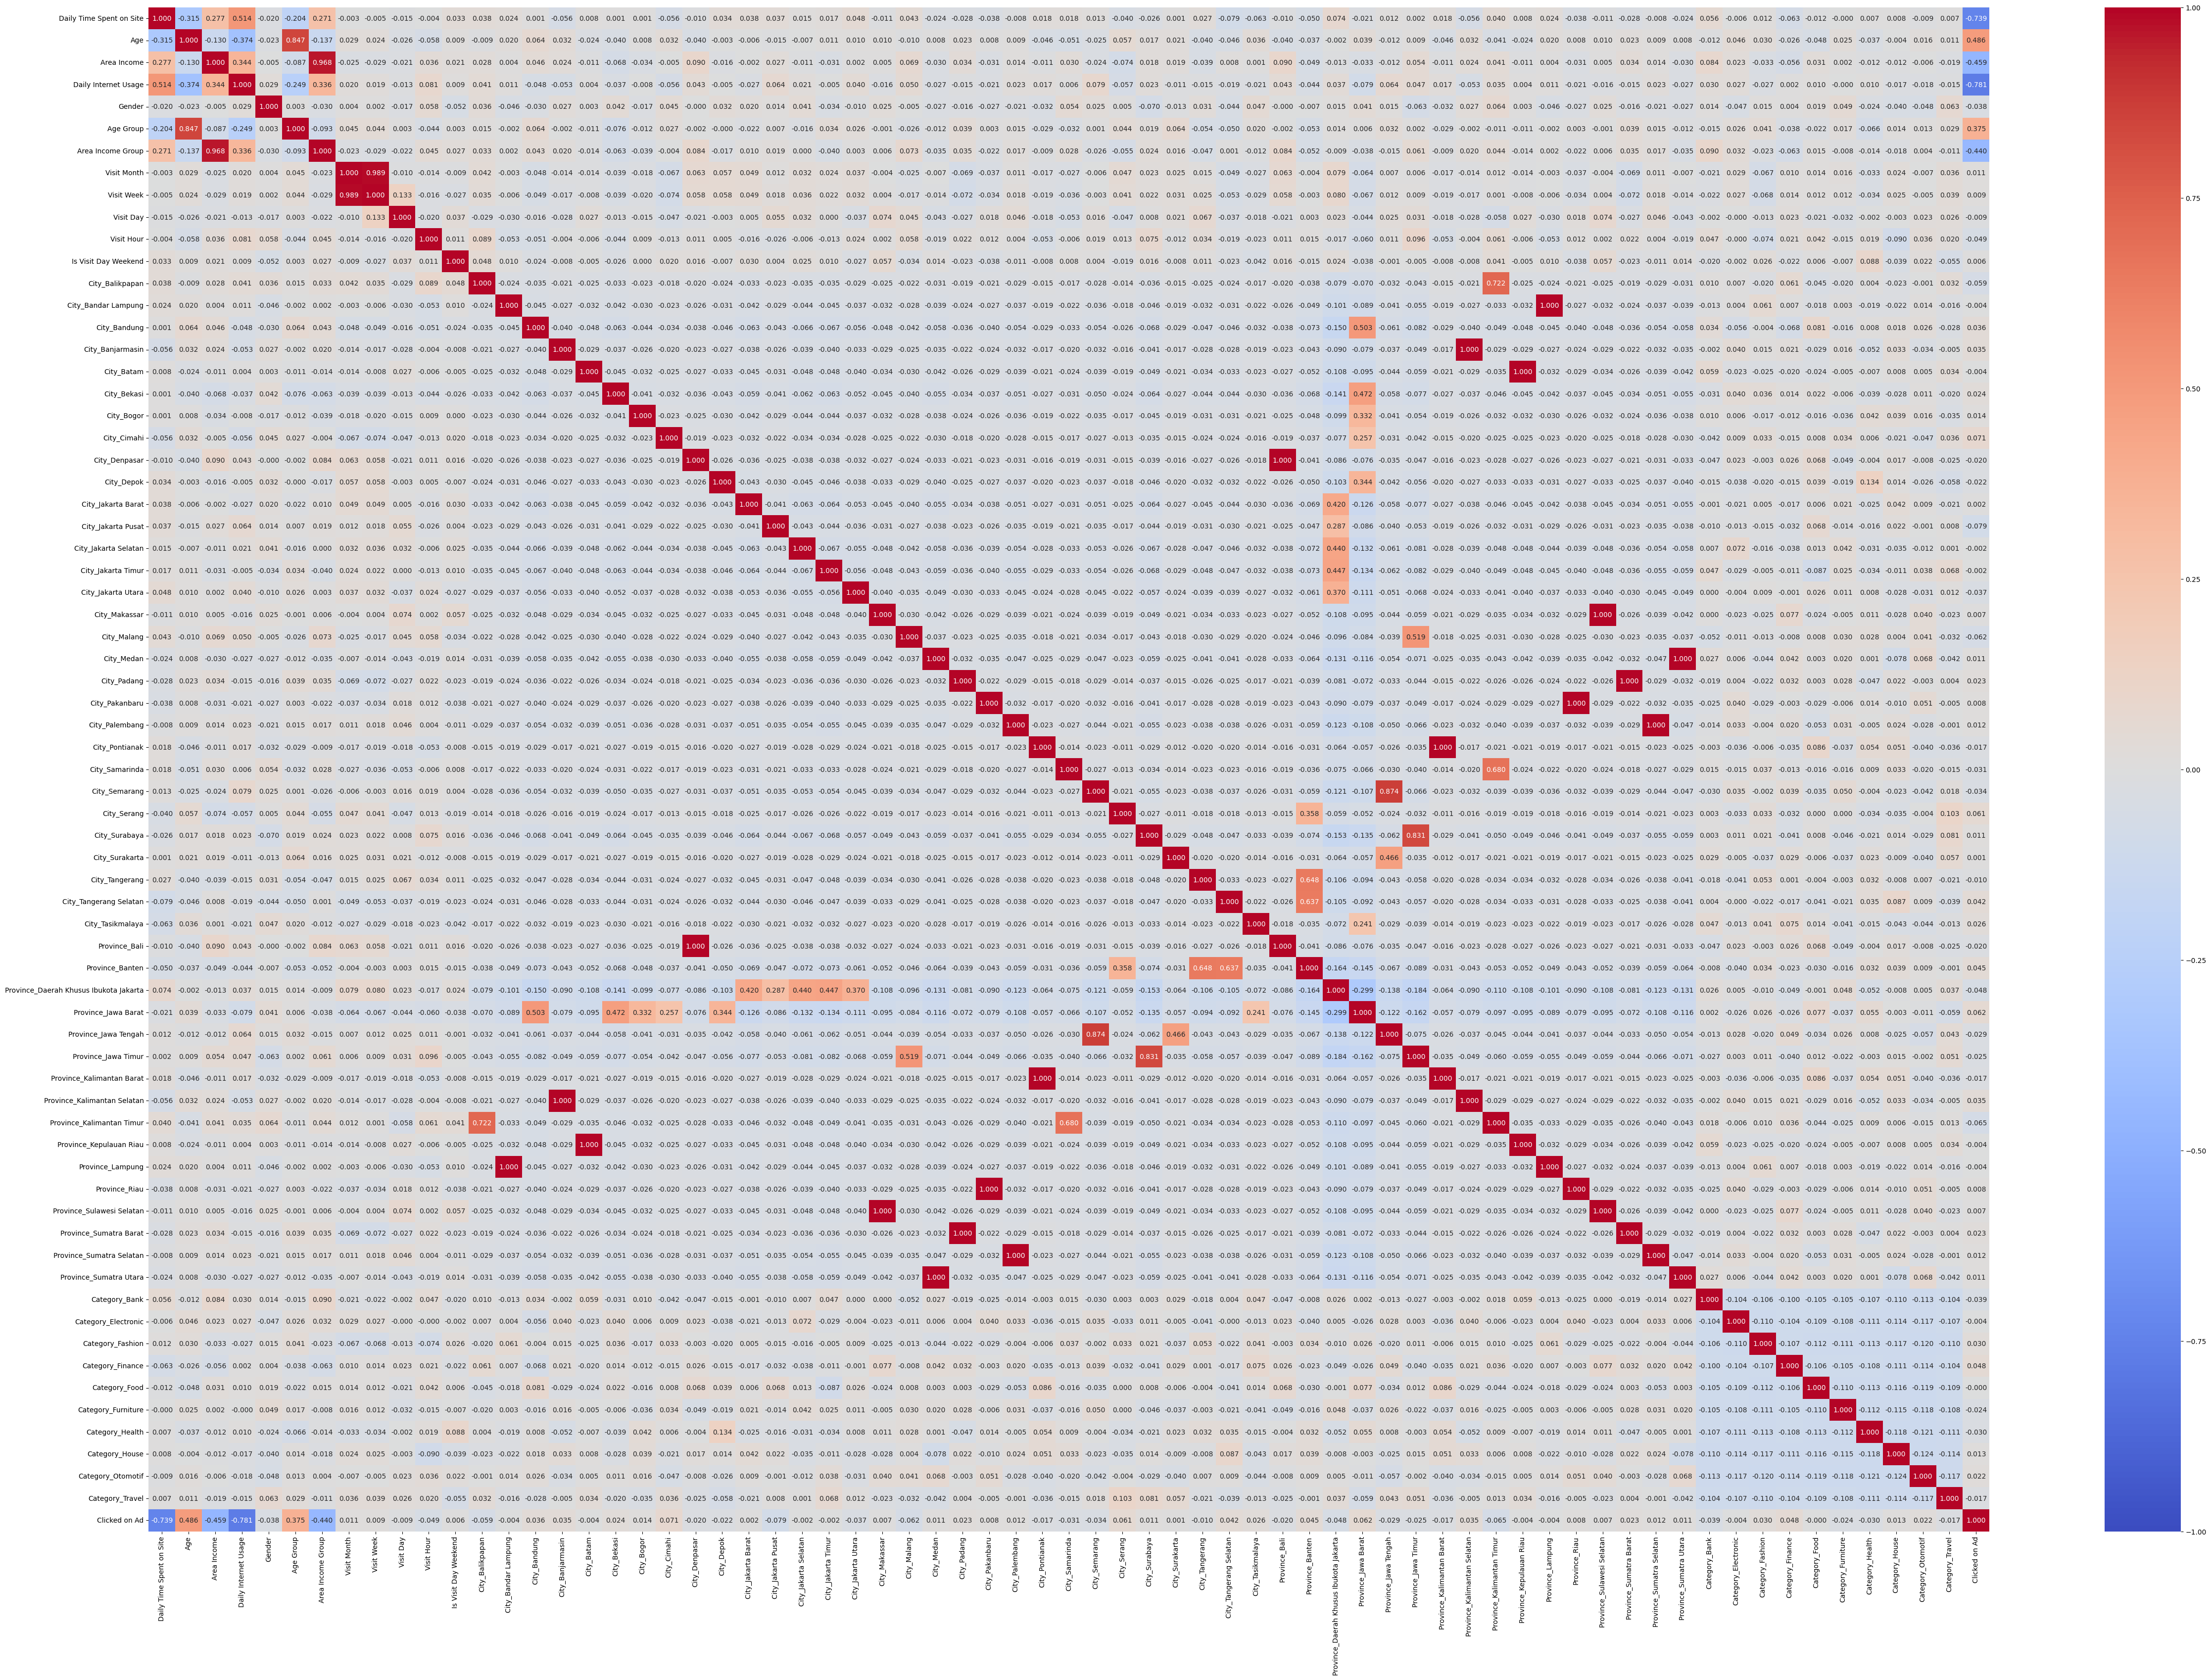

In [58]:
# Heatmap (Spearman corr)
plt.figure(figsize=(60, 40))
sns.heatmap(data = df_preprocessed.corr(method='spearman', numeric_only=True), cmap='coolwarm', annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

In [59]:
# Feature-Feature correlation representation in tabular form 
corr_feature = df_preprocessed.corr(method='spearman')

# Flatten the correlation matrix
flat_cm = corr_feature.stack().reset_index()
flat_cm.columns = ['A', 'B', 'Corr Value']

flat_cm = flat_cm.loc[flat_cm['Corr Value'] < 1, :]
flat_cm = flat_cm[(flat_cm['A'] != 'Clicked on Ad') & (flat_cm['B'] != 'Clicked on Ad')]

flat_cm['Corr Type'] = flat_cm['Corr Value'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')
flat_cm['Corr Value'] = flat_cm['Corr Value'].apply(lambda x : abs(x))
flat_cm = flat_cm.sort_values(by='Corr Value', ascending=False, ignore_index=True)

redundant_cm = flat_cm[flat_cm['Corr Value'] >= 0.5]
redundant_cm = redundant_cm.drop_duplicates(subset=['Corr Value', 'Corr Type']).reset_index(drop=True)

pd.set_option('display.max_rows', None)
display(redundant_cm)
pd.reset_option('display.max_rows')

A                          B  Corr Value Corr Type
0                  Visit Week                Visit Month    0.988955  Positive
1                 Area Income          Area Income Group    0.968185  Positive
2               City_Semarang       Province_Jawa Tengah    0.873964  Positive
3                   Age Group                        Age    0.847434  Positive
4         Province_Jawa Timur              City_Surabaya    0.831364  Positive
5             City_Balikpapan  Province_Kalimantan Timur    0.721600  Positive
6   Province_Kalimantan Timur             City_Samarinda    0.679633  Positive
7             Province_Banten             City_Tangerang    0.647777  Positive
8      City_Tangerang Selatan            Province_Banten    0.637243  Positive
9                 City_Malang        Province_Jawa Timur    0.519355  Positive
10   Daily Time Spent on Site       Daily Internet Usage    0.513791  Positive
11        Province_Jawa Barat               City_Bandung    0.502760  Positive

In [60]:
# Feature-Target correlation representation in tabular form 
corr_target = df_preprocessed.corrwith(df_preprocessed['Clicked on Ad'], method='spearman', numeric_only=True)
corr = corr_target.reset_index(name='Corr Value')
corr = corr[corr['index'] != "Clicked on Ad"]
corr = corr.rename(columns={'index' : 'Feature'})

corr['Corr Type'] = corr['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
corr['Corr Value'] = corr['Corr Value'].apply(lambda x : abs(x))
corr = corr.sort_values('Corr Value', ascending=False, ignore_index=True)
corr = corr[corr['Corr Value'] >= 0.35]
corr

Feature  Corr Value Corr Type
0      Daily Internet Usage    0.780693  Negative
1  Daily Time Spent on Site    0.738982  Negative
2                       Age    0.486129  Positive
3               Area Income    0.458972  Negative
4         Area Income Group    0.440087  Negative
5                 Age Group    0.374842  Positive

### SelectKBest Feature Importance (Statistical Test)

#### Additional Information Regarding Feature Relevance Calculation Method using SelectKBest

`sklearn.feature_selection.f_classif`, `sklearn.feature_selection.mutual_info_classif`, and `sklearn.feature_selection.chi2` are three different feature selection methods in scikit-learn, and each of them uses a different statistical test or measure to evaluate the importance of features in a classification task.

1. **`sklearn.feature_selection.f_classif`:**

   - **Type of Test:** Analysis of variance (ANOVA) F-statistic.
   - **Nature:** Assesses the linear dependency between each feature and the target variable.
   - **Assumption:** Assumes that the features are normally distributed and that the variance of the feature values is roughly equal across different classes.
   - **Usage:** Suitable for identifying features with significant differences in means among different classes.

   ```python
   from sklearn.feature_selection import f_classif
   ```

2. **`sklearn.feature_selection.mutual_info_classif`:**

   - **Type of Measure:** Mutual information, a non-parametric measure of the dependency between variables.
   - **Nature:** Captures any kind of statistical dependency, whether it is linear or non-linear.
   - **Assumption:** Has fewer assumptions compared to `f_classif` and is more robust when the relationship between features and the target variable is not strictly linear.
   - **Usage:** Suitable for identifying features with any type of relationship with the target variable.

   ```python
   from sklearn.feature_selection import mutual_info_classif
   ```

3. **`sklearn.feature_selection.chi2`:**

   - **Type of Test:** Chi-squared (χ²) statistical test.
   - **Nature:** Assesses the independence between each feature and the target variable.
   - **Assumption:** Assumes that the features and target variable are categorical.
   - **Usage:** Suitable for identifying features that are independent of the target variable in a categorical setting.

   ```python
   from sklearn.feature_selection import chi2
   ```

**Summary:**
- `f_classif` is based on the F-statistic and assumes a linear relationship between features and the target variable.
- `mutual_info_classif` is based on mutual information and is non-parametric, capturing any kind of statistical dependency.
- `chi2` uses the chi-squared test and is suitable for categorical data, assessing the independence between features and the target variable.

The choice between these methods depends on the nature of your data, the type of variables you have, and the assumptions you are willing to make about the relationships between features and the target variable. If your data is categorical, `chi2` might be more appropriate, while `f_classif` and `mutual_info_classif` are suitable for continuous or ordinal data.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Additional Information Regarding Scipy Statistical Tests

In `scipy`, you can determine feature importance using statistical tests that compute p-values. Here are some commonly used methods along with the corresponding functions in `scipy.stats`:

1. **T-test**: Determines if there is a significant difference between the means of two groups.
   - Function: `scipy.stats.ttest_ind()`

2. **ANOVA (Analysis of Variance)**: Determines if there are statistically significant differences between the means of three or more independent groups.
   - Function: `scipy.stats.f_oneway()`

3. **Chi-square test**: Tests the independence between two categorical variables.
   - Function: `scipy.stats.chi2_contingency()`

4. **Correlation test (Pearson, Spearman, etc.)**: Measures the strength and direction of association between two continuous variables.
   - Functions:
     - Pearson correlation: `scipy.stats.pearsonr()`
     - Spearman correlation: `scipy.stats.spearmanr()`
     - Kendall correlation: `scipy.stats.kendalltau()`

5. **Mutual information**: Measures the dependency between two variables by computing the reduction in uncertainty of one variable given the other.
   - Function: `sklearn.feature_selection.mutual_info_regression()` for regression problems and `sklearn.feature_selection.mutual_info_classif()` for classification problems.

6. **ANOVA F-value for feature selection**: Computes the ANOVA F-value for the provided sample and target variable.
   - Function: `sklearn.feature_selection.f_classif()` for classification problems and `sklearn.feature_selection.f_regression()` for regression problems.

Each of these methods provides a p-value, which indicates the significance of the relationship between the feature and the target variable. Lower p-values typically suggest stronger evidence against the null hypothesis, indicating a more significant feature.

Choose the appropriate method based on the nature of your data and the assumptions of the statistical test.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [61]:
# Create temporary dataframe for testing SelectKBest
df_feature_target_relation = df_preprocessed.copy()
df_feature_target_relation.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Gender  \
0                     68.95   35  432837300.0                256.09       0   
1                     80.23   31  479092950.0                193.77       1   
2                     69.47   26  418501580.0                236.50       0   
3                     74.15   29  383643260.0                245.89       1   
4                     68.37   35  517229930.0                225.58       0   

   Age Group  Area Income Group  Visit Month  Visit Week  Visit Day  \
0          1                  2            3          12         27   
1          1                  3            4          14          4   
2          0                  2            3          10         13   
3          0                  1            1           1         10   
4          1                  3            6          22          3   

   Visit Hour  Is Visit Day Weekend  City_Balikpapan  City_Bandar Lampung  \
0           0                     1                0                    0   
1           1                     0                0                    0   
2          20                     1                0                    0   
3           2                     1                0                    0   
4           3                     0                0                    0   

   City_Bandung  City_Banjarmasin  City_Batam  City_Bekasi  City_Bogor  \
0             0                 0           0            0           0   
1             0                 0           0            0           0   
2             0                 0           0            0           0   
3             0                 0           1            0           0   
4             0                 0           0            0           0   

   City_Cimahi  City_Denpasar  City_Depok  City_Jakarta Barat  \
0            0              0           0                   0   
1            0              1           0                   0   
2            0              0           0                   0   
3            0              0           0                   0   
4            0              0           0                   0   

   City_Jakarta Pusat  City_Jakarta Selatan  City_Jakarta Timur  \
0                   0                     0                   1   
1                   0                     0                   0   
2                   0                     0                   0   
3                   0                     0                   0   
4                   0                     0                   0   

   City_Jakarta Utara  City_Makassar  City_Malang  City_Medan  City_Padang  \
0                   0              0            0           0            0   
1                   0              0            0           0            0   
2                   0              0            0           0            0   
3                   0              0            0           0            0   
4                   0              0            0           1            0   

   City_Pakanbaru  City_Palembang  City_Pontianak  City_Samarinda  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   City_Semarang  City_Serang  City_Surabaya  City_Surakarta  City_Tangerang  \
0              0            0              0               0               0   
1              0            0              0               0               0   
2              0            0              1               0               0   
3              0            0              0               0               0   
4              0            0              0               0               0   

   City_Tangerang Selatan  City_Ta

In [62]:
# Calculation of feature importance score to target (numerical/categorical feature - categorical target)
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Separate features and target variable
x_features_test = df_feature_target_relation.drop(columns=['Clicked on Ad'])  # Features
y_target_test = df_feature_target_relation['Clicked on Ad']  # Target variable

# Instantiate SelectKBest
k_best = SelectKBest(score_func=mutual_info_classif, k='all')  # Use 'all' to see scores for all features

# Fit and transform the data
x_selected_features = k_best.fit_transform(x_features_test, y_target_test)

# Get scores, p-values, and feature names
feature_scores = k_best.scores_
feature_pvalues = k_best.pvalues_ #for mutual_info_classif this will display None but not for other method
feature_names = x_features_test.columns

# Create a DataFrame to display feature scores and p-values
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores, 'P_Values' : feature_pvalues})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores and p-values
pd.set_option('display.max_rows', None)  # Set max_rows to None for unlimited rows
display(feature_scores_df)

pd.reset_option('display.max_rows')

Feature     Score P_Values
3                     Daily Internet Usage  0.419530     None
0                 Daily Time Spent on Site  0.365842     None
1                                      Age  0.140996     None
2                              Area Income  0.127160     None
5                                Age Group  0.095072     None
6                        Area Income Group  0.092193     None
51                 Province_Kepulauan Riau  0.025288     None
35                           City_Semarang  0.020624     None
55                  Province_Sumatra Barat  0.019724     None
41                        City_Tasikmalaya  0.018329     None
26                      City_Jakarta Utara  0.018152     None
31                          City_Pakanbaru  0.018039     None
59                     Category_Electronic  0.017726     None
11                    Is Visit Day Weekend  0.016828     None
50               Province_Kalimantan Timur  0.014674     None
60                        Category_Fashion  0.014537     None
43                         Province_Banten  0.014121     None
53                           Province_Riau  0.013788     None
8                               Visit Week  0.012847     None
19                             City_Cimahi  0.012596     None
25                      City_Jakarta Timur  0.012576     None
24                    City_Jakarta Selatan  0.011099     None
40                  City_Tangerang Selatan  0.010558     None
34                          City_Samarinda  0.010553     None
33                          City_Pontianak  0.010183     None
39                          City_Tangerang  0.010050     None
63                      Category_Furniture  0.009721     None
66                       Category_Otomotif  0.008857     None
20                           City_Denpasar  0.004069     None
64                         Category_Health  0.003925     None
18                              City_Bogor  0.003857     None
42                           Province_Bali  0.003728     None
32                          City_Palembang  0.003269     None
37                           City_Surabaya  0.003169     None
58                           Category_Bank  0.000400     None
54               Province_Sulawesi Selatan  0.000000     None
9                                Visit Day  0.000000     None
10                              Visit Hour  0.000000     None
56                Province_Sumatra Selatan  0.000000     None
52                        Province_Lampung  0.000000     None
23                      City_Jakarta Pusat  0.000000     None
4                                   Gender  0.000000     None
57                  Province_Sumatra Utara  0.000000     None
7                              Visit Month  0.000000     None
13                     City_Bandar Lampung  0.000000     None
61                        Category_Finance  0.000000     None
62                           Category_Food  0.000000     None
65                          Category_House  0.000000     None
12                         City_Balikpapan  0.000000     None
46                    Province_Jawa Tengah  0.000000     None
49             Province_Kalimantan Selatan  0.000000     None
48               Province_Kalimantan Barat  0.000000     None
21                              City_Depok  0.000000     None
27                           City_Makassar  0.000000     None
28                             City_Malang  0.000000     None
29                              City_Medan  0.000000     None
30                             City_Padang  0.000000     None
17                             City_Bekasi  0.000000     None
36                             City_Serang  0.000000     None
38                          City_Surakarta  0.000000     None
16                              City_Batam  0.000000     None
15                        City_Banjarmasin  0.000000     None
14                            City_Bandung  0.000000     None
44  Province_Daerah Khusus Ibukota Jakarta  0.000000     None
45   

In [63]:
#Calculation of feature importance score to target (categorical feature - categorical target)
from sklearn.feature_selection import SelectKBest, chi2

# Separate features and target variable
x_features_test = df_feature_target_relation.drop(columns=['Clicked on Ad'])  # Features
y_target_test = df_feature_target_relation['Clicked on Ad']  # Target variable

# Instantiate SelectKBest
k_best = SelectKBest(score_func=chi2, k='all')  # Use 'all' to see scores for all features

# Fit and transform the data
x_selected_features = k_best.fit_transform(x_features_test, y_target_test)

# Get scores, p-values, and feature names
feature_scores = k_best.scores_
feature_pvalues = k_best.pvalues_ #for mutual_info_classif this will display None but not for other method
feature_names = x_features_test.columns

# Create a DataFrame to display feature scores and p-values
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores, 'P_Values' : feature_pvalues})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores and p-values
pd.set_option('display.max_rows', None)  # Set max_rows to None for unlimited rows
display(feature_scores_df)

pd.reset_option('display.max_rows')

Feature         Score       P_Values
2                              Area Income  4.577025e+09   0.000000e+00
3                     Daily Internet Usage  6.586997e+03   0.000000e+00
0                 Daily Time Spent on Site  2.094096e+03   0.000000e+00
1                                      Age  5.189736e+02  7.076999e-115
6                        Area Income Group  1.578516e+02   3.334855e-36
5                                Age Group  5.720299e+01   3.930737e-14
10                              Visit Hour  9.782893e+00   1.761429e-03
23                      City_Jakarta Pusat  6.025858e+00   1.409778e-02
19                             City_Cimahi  4.929986e+00   2.639453e-02
50               Province_Kalimantan Timur  4.020468e+00   4.495123e-02
36                             City_Serang  3.710112e+00   5.408377e-02
28                             City_Malang  3.666966e+00   5.550113e-02
12                         City_Balikpapan  3.412014e+00   6.472342e-02
45                     Province_Jawa Barat  2.990635e+00   8.374732e-02
61                        Category_Finance  2.100947e+00   1.472080e-01
43                         Province_Banten  1.863507e+00   1.722206e-01
44  Province_Daerah Khusus Ibukota Jakarta  1.710653e+00   1.909007e-01
40                  City_Tangerang Selatan  1.710487e+00   1.909222e-01
58                           Category_Bank  1.389576e+00   2.384767e-01
26                      City_Jakarta Utara  1.312975e+00   2.518567e-01
14                            City_Bandung  1.182777e+00   2.767914e-01
49             Province_Kalimantan Selatan  1.179768e+00   2.774032e-01
15                        City_Banjarmasin  1.179768e+00   2.774032e-01
35                           City_Semarang  1.071448e+00   3.006187e-01
34                          City_Samarinda  9.287424e-01   3.351899e-01
64                         Category_Health  8.072368e-01   3.689385e-01
46                    Province_Jawa Tengah  8.018215e-01   3.705493e-01
60                        Category_Fashion  7.936210e-01   3.730075e-01
4                                   Gender  7.397065e-01   3.897549e-01
41                        City_Tasikmalaya  6.557817e-01   4.180531e-01
47                     Province_Jawa Timur  5.732736e-01   4.489610e-01
17                             City_Bekasi  5.499445e-01   4.583404e-01
30                             City_Padang  5.297854e-01   4.666971e-01
55                  Province_Sumatra Barat  5.297854e-01   4.666971e-01
63                      Category_Furniture  5.158788e-01   4.726050e-01
21                              City_Depok  4.631920e-01   4.961360e-01
8                               Visit Week  4.413491e-01   5.064720e-01
66                       Category_Otomotif  4.396832e-01   5.072754e-01
42                           Province_Bali  3.758441e-01   5.398359e-01
20                           City_Denpasar  3.758441e-01   5.398359e-01
48               Province_Kalimantan Barat  2.980207e-01   5.851259e-01
33                          City_Pontianak  2.980207e-01   5.851259e-01
67                         Category_Travel  2.739596e-01   6.006879e-01
9                                Visit Day  2.572780e-01   6.119964e-01
18                              City_Bogor  1.815084e-01   6.700801e-01
65                          Category_House  1.474399e-01   7.009940e-01
56                Province_Sumatra Selatan  1.350402e-01   7.132623e-01
32                          City_Palembang  1.350402e-01   7.132623e-01
57                  Province_Sumatra Utara  1.236294e-01   7.251310e-01
29                              City_Medan  1.236294e-01   7.251310e-01
7                              Visit Month  1.087889e-01   7.415272e-01
37                           City_Surabaya  1.041141e-01   7.469473e-01
39                          City_Tangerang  9.131988e-02   7.625059e-01
53                           Province_Riau  6.354397e-02   8.009798e-01
31                          City_Pakanbaru  6.354397e-02   8.009798e-01
54 

- Reviewing the statistical test values of several features generated, I've decided not to use some engineered features in training the model due to multicollinearity issues with the original features. Therefore, these engineered features will only be used for analysis purposes.

- Meanwhile, some one-hot encoded features like city and province have many features with very low importance to the target, so those features will not be used.

- **Most of the features that will be used are from original features**

In [64]:
df_preprocessed.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Gender', 'Age Group', 'Area Income Group',
       'Visit Month', 'Visit Week', 'Visit Day', 'Visit Hour',
       'Is Visit Day Weekend', 'City_Balikpapan', 'City_Bandar Lampung',
       'City_Bandung', 'City_Banjarmasin', 'City_Batam', 'City_Bekasi',
       'City_Bogor', 'City_Cimahi', 'City_Denpasar', 'City_Depok',
       'City_Jakarta Barat', 'City_Jakarta Pusat', 'City_Jakarta Selatan',
       'City_Jakarta Timur', 'City_Jakarta Utara', 'City_Makassar',
       'City_Malang', 'City_Medan', 'City_Padang', 'City_Pakanbaru',
       'City_Palembang', 'City_Pontianak', 'City_Samarinda', 'City_Semarang',
       'City_Serang', 'City_Surabaya', 'City_Surakarta', 'City_Tangerang',
       'City_Tangerang Selatan', 'City_Tasikmalaya', 'Province_Bali',
       'Province_Banten', 'Province_Daerah Khusus Ibukota Jakarta',
       'Province_Jawa Barat', 'Province_Jawa Tengah', 'Province_Jawa Timur',
       'Provi

In [65]:
# Select only relevant features for each cases before moving to modelling process
df_model = df_preprocessed.copy()

# Important features only based on correlation and K-best parameter (correlation > 0.7 will be dropped)
selected_features = ['Daily Time Spent on Site', 'Age', 'Area Income',
                    'Daily Internet Usage', 'Gender', 'Category_Bank', 'Category_Electronic',
                    'Category_Fashion', 'Category_Finance', 'Category_Food',
                    'Category_Furniture', 'Category_Health', 'Category_House',
                    'Category_Otomotif', 'Category_Travel', 'Clicked on Ad']

df_model = df_model[selected_features]

## Split Train and Test Data

In [66]:
# Split Train and Test Data
x = df_model.drop(columns=['Clicked on Ad'])
y = df_model['Clicked on Ad']

x1 = x.copy()
y1 = y.copy()
x2 = x.copy()
y2 = y.copy()

from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42) # Data without normalization/standardization
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42) # Data with normalization/standardization


#Check dimension of train and test data
print(f'Dimension of x_train data : {x1_train.shape}')
print(f'Dimension of y_train data : {y1_train.shape}')
print(f'Dimension of x_test data : {x1_test.shape}')
print(f'Dimension of y_test data : {y1_test.shape}')

Dimension of x_train data : (693, 15)
Dimension of y_train data : (693,)
Dimension of x_test data : (298, 15)
Dimension of y_test data : (298,)


In [67]:
# Check distribution of target after splitting
display(y1_train.value_counts())

display(y1_test.value_counts())

Clicked on Ad
1    347
0    346
Name: count, dtype: int64

Clicked on Ad
0    154
1    144
Name: count, dtype: int64

## Feature Scalling

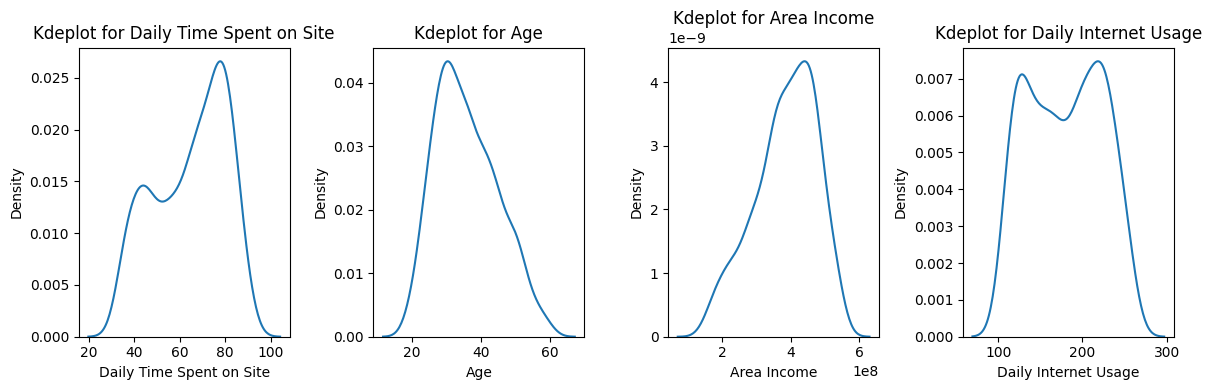

In [68]:
# Checking distribution before scaling
fig, ax  = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
ax = ax.flatten()

columns_to_scale = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'] # Choose columns for scaling based on the distribution in EDA

for i, col in enumerate(columns_to_scale) :
    sns.kdeplot(data=x2_train, x=col, ax=ax[i])
    ax[i].set_title(f'Kdeplot for {col}')

# Remove the sixth subplot
# del ax[5]
# ax[5].axis('off')

plt.tight_layout()
plt.show()

The overall feature distribution is near normal distribution, but the problem lies in the values range. The proper method of scalling for this case is standardization.

**Reminder About Choosing Scaling Methods**

If the issue is primarily with the range of values rather than the shape of the distributions, you can use scaling methods to bring all features to a similar scale without altering their distributions. Here are some common scaling methods you can consider:

1. **Min-Max Scaling (Normalization)**:
   - Scales the data to a fixed range, usually between 0 and 1.
   - Formula: \( X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} \)
   - Use when you know the minimum and maximum values for your features or when you want to bound the data within a specific range.

2. **Standard Scaling (Standardization)**:
   - Scales the data so that it has a mean of 0 and a standard deviation of 1.
   - Formula: \( X_{\text{scaled}} = \frac{X - \mu}{\sigma} \)
   - Use when the features are normally distributed or when you're using models that assume zero-centered data.

3. **Robust Scaling**:
   - Scales the data similarly to standard scaling but uses the median and the interquartile range (IQR) instead of the mean and standard deviation.
   - Formula: \( X_{\text{scaled}} = \frac{X - \text{median}(X)}{\text{IQR}(X)} \)
   - Use when the data contains outliers or when the distribution is not normal.

4. **Max Abs Scaler**:
   - Scales each feature to its maximum absolute value.
   - Formula: \( X_{\text{scaled}} = \frac{X}{\max(|X|)} \)
   - Use when the features are sparse or when you want to preserve sparsity.

5. **Power Transformer (Yeo-Johnson or Box-Cox)**:
   - Applies a power transformation to make the data more Gaussian-like.
   - Use when the data is skewed or when you need to stabilize variance.

For your case where the overall feature distributions are near normal but the ranges vary significantly, Min-Max Scaling or Standard Scaling might be appropriate. If you're concerned about outliers, Robust Scaling could be a better choice. It's often a good idea to try different scaling methods and see which one works best for your specific dataset and model.

In [69]:
# Statistical summary of mean and standard deviation before scale
x2_train[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']].describe().transpose()[['mean', 'std']]

mean           std
Daily Time Spent on Site  6.469393e+01  1.579638e+01
Age                       3.603608e+01  8.968643e+00
Area Income               3.849767e+08  9.025912e+07
Daily Internet Usage      1.794542e+02  4.393979e+01

In [70]:
# Scaling with standardization method
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x2_train[columns_to_scale] = ss.fit_transform(x2_train[columns_to_scale])
x2_test[columns_to_scale] = ss.transform(x2_test[columns_to_scale])

In [71]:
# Statistical summary of mean and standard deviation after scale
x2_train[columns_to_scale].describe().transpose()[['mean', 'std']]

mean       std
Daily Time Spent on Site -4.844610e-16  1.000722
Age                       3.486068e-16  1.000722
Area Income               1.307276e-16  1.000722
Daily Internet Usage     -4.114073e-16  1.000722

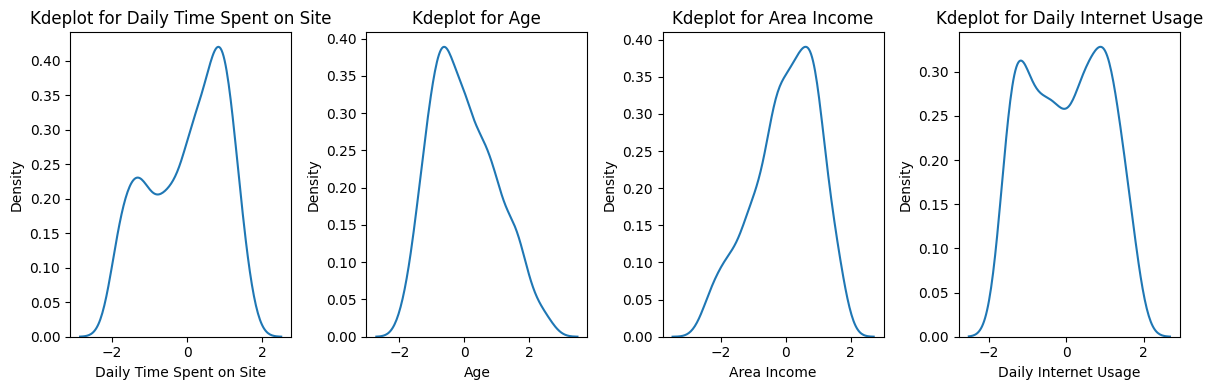

In [72]:
# Checking distribution after scaling
fig, ax  = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
ax = ax.flatten()

for i, col in enumerate(columns_to_scale) :
    sns.kdeplot(data=x2_train, x=col, ax=ax[i])
    ax[i].set_title(f'Kdeplot for {col}')

# Remove the sixth subplot
# del ax[5]
# ax[5].axis('off')

plt.tight_layout()
plt.show()

# **STAGE 3 : MODELLING AND EVALUATION**

## **Before Normalization/Standardization**

### Helper Function

First we will define some functions that will help us in the process of training and evaluation.

In [73]:
# Import metrics score that will be evalueated
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
import time

# Evaluation score calculation
def eval_classification(model):
    y_pred = model.predict(x1_test)
    y_pred_train = model.predict(x1_train)
    y_pred_proba = model.predict_proba(x1_test)
    y_pred_proba_train = model.predict_proba(x1_train)

    # Print evaluation scores
    print(f"Accuracy Score (Test Set): {accuracy_score(y_pred, y1_test)* 100:.2f}")
    print(f"Accuracy Score (Train Set): {accuracy_score(y1_train, y_pred_train)* 100:.2f}")

    print(f"Precision Score (Test Set): {precision_score(y_pred, y1_test)* 100:.2f}")
    print(f"Precision Score (Train Set): {precision_score(y1_train, y_pred_train)* 100:.2f}")

    print(f"Recall Score (Test Set): {recall_score(y_pred, y1_test)* 100:.2f}")
    print(f"Recall Score (Train Set): {recall_score(y1_train, y_pred_train)* 100:.2f}")

    print(f"F1 Score (Test Set): {f1_score(y_pred, y1_test)* 100:.2f}")
    print(f"F1 Score (Train Set): {f1_score(y1_train, y_pred_train)* 100:.2f}")
    
    print(f"ROC-AUC (Test-Proba): {roc_auc_score(y1_test, y_pred_proba[:, 1])* 100:.2f}")
    print(f"ROC-AUC (Train-Proba): {roc_auc_score(y1_train, y_pred_proba_train[:, 1])* 100:.2f}")

    # Cross Validation
    cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 5)
    score = cross_validate(model, x1_train, y1_train, cv=cv, scoring='accuracy', return_train_score=True) # Scoring change based on what metrics we want to validate (usually choose the main performance metric)
    print(f'Accuracy (Crossval Test): {score['test_score'].mean()* 100:.2f}') 
    print(f'Accuracy (Crossval Train): {score['train_score'].mean()* 100:.2f}')

def grid_pipe1(pipedict, hyperdict, scoring='accuracy', display=True):
    fitted_models1 = {}
    fit_time1 = []
    for name, pipeline in pipedict.items():

    # Construct grid search
        cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 5)
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=cv, verbose=2, n_jobs=-1, return_train_score = True, error_score='raise')

        # Fit using grid search
        start = time.time()
        model.fit(x1_train, y1_train)
        end = time.time()
        fit_time1.append(round(end-start, 2))

        #Append model
        fitted_models1[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # print fit time
            print('Total Fit Time: %.3fs' % (end-start))
            # Best accuracy
            print('Best accuracy: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')

    return fitted_models1, fit_time1 

def confusion_matrix1(model):
    y_pred = model.predict(x1_test)
    y_pred_proba = model.predict_proba(x1_test)

    print(f"Accuracy Score (Test Set): {accuracy_score(y_pred, y1_test) * 100:.2f}")
    print(f"Precision Score (Test Set): {precision_score(y_pred, y1_test) * 100:.2f}")
    print(f"Recall Score (Test Set): {recall_score(y_pred, y1_test) * 100:.2f}")
    print(f"F1 Score (Test Set): {f1_score(y_pred, y1_test) *100:.2f}")
    print(f"ROC-AUC (Test-Proba): {roc_auc_score(y1_test, y_pred_proba[:, 1]) *100:.2f}")

    conf_mat = confusion_matrix(y1_test, y_pred)
    ax = plt.subplot()
    sns.heatmap(conf_mat, ax=ax, fmt='d', cmap='Blues', xticklabels=['False (0)', 'True (1)'], yticklabels=['False (0)', 'True (1)'])

    # Add annotations for TN, FN, FP, TP
    for i in range(2):
        for j in range(2):
            if i == 0 and j == 0:
                text = f'TN = {conf_mat[i, j]}'
            elif i == 1 and j == 0:
                text = f'FN = {conf_mat[i, j]}'
            elif i == 0 and j == 1:
                text = f'FP = {conf_mat[i, j]}'
            elif i == 1 and j == 1:
                text = f'TP = {conf_mat[i, j]}'

            plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black', fontsize=12)
            
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {str(model)}')

**Additional Information About confusion_matrix in sckit-learn**

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

The `confusion_matrix` function from scikit-learn is used to compute the confusion matrix, which is a table that summarizes the performance of a classification algorithm. The confusion matrix is typically a 2x2 matrix for binary classification problems.

Here's the breakdown:

```python
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
conf_mat = confusion_matrix(y_test, y_pred)
```

The confusion matrix `conf_mat` will be a 2x2 matrix in the form:

```
[[True Negative  False Positive]
 [False Negative True Positive]]
```

- True Negative (TN): The instances that are actually negative (class 0) and are predicted correctly as negative.
- False Positive (FP): The instances that are actually negative (class 0) but are predicted incorrectly as positive.
- False Negative (FN): The instances that are actually positive (class 1) but are predicted incorrectly as negative.
- True Positive (TP): The instances that are actually positive (class 1) and are predicted correctly as positive.

So, in the confusion matrix `conf_mat`, the elements are arranged as follows:

- `conf_mat[0, 0]`: True Negatives (TN)
- `conf_mat[0, 1]`: False Positives (FP)
- `conf_mat[1, 0]`: False Negatives (FN)
- `conf_mat[1, 1]`: True Positives (TP)

These values help evaluate the performance of your binary classification model. The diagonal elements (`conf_mat[0, 0]` and `conf_mat[1, 1]`) represent correct predictions, while the off-diagonal elements represent errors in predictions.

### Train Vanilla Models

In [76]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Initiatialize object for each model
lg1 = LogisticRegression(random_state=42)
knn1 = KNeighborsClassifier()
dt1 = DecisionTreeClassifier(random_state=42)
rf1 = RandomForestClassifier(random_state=42)
gb1 = GradientBoostingClassifier(random_state=42)
xgb1 = XGBClassifier(random_state=42)

models = [lg1, knn1, dt1, rf1, gb1, xgb1]

# Train models
for model in models :
    model.fit(x1_train, y1_train)

### Evaluate Vanilla Models

#### Logistic Regression

In [77]:
eval_classification(lg1)

Accuracy Score (Test Set): 91.61
Accuracy Score (Train Set): 89.47
Precision Score (Test Set): 88.19
Precision Score (Train Set): 92.02
Recall Score (Test Set): 94.07
Recall Score (Train Set): 86.46
F1 Score (Test Set): 91.04
F1 Score (Train Set): 89.15
ROC-AUC (Test-Proba): 96.20
ROC-AUC (Train-Proba): 95.16
Accuracy (Crossval Test): 77.79
Accuracy (Crossval Train): 78.22


Accuracy Score (Test Set): 91.61
Precision Score (Test Set): 88.19
Recall Score (Test Set): 94.07
F1 Score (Test Set): 91.04
ROC-AUC (Test-Proba): 96.20


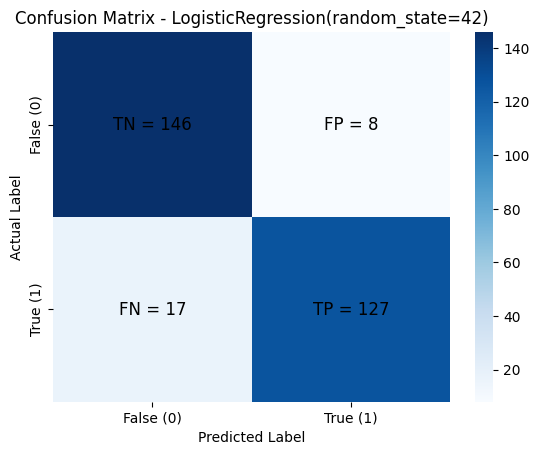

In [78]:
confusion_matrix1(lg1)

#### K-Nearest Neighbours

In [79]:
eval_classification(knn1)

Accuracy Score (Test Set): 65.77
Accuracy Score (Train Set): 76.48
Precision Score (Test Set): 54.86
Precision Score (Train Set): 78.22
Recall Score (Test Set): 68.10
Recall Score (Train Set): 73.49
F1 Score (Test Set): 60.77
F1 Score (Train Set): 75.78
ROC-AUC (Test-Proba): 68.05
ROC-AUC (Train-Proba): 85.57
Accuracy (Crossval Test): 66.44
Accuracy (Crossval Train): 76.67


Accuracy Score (Test Set): 65.77
Precision Score (Test Set): 54.86
Recall Score (Test Set): 68.10
F1 Score (Test Set): 60.77
ROC-AUC (Test-Proba): 68.05


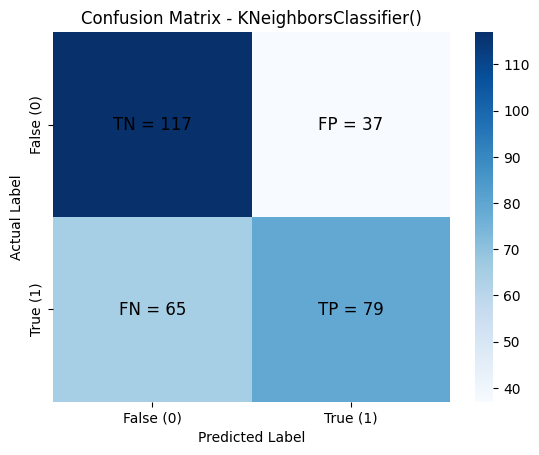

In [80]:
confusion_matrix1(knn1)

#### Decision Tree

In [81]:
eval_classification(dt1)

Accuracy Score (Test Set): 94.30
Accuracy Score (Train Set): 100.00
Precision Score (Test Set): 94.44
Precision Score (Train Set): 100.00
Recall Score (Test Set): 93.79
Recall Score (Train Set): 100.00
F1 Score (Test Set): 94.12
F1 Score (Train Set): 100.00
ROC-AUC (Test-Proba): 94.30
ROC-AUC (Train-Proba): 100.00
Accuracy (Crossval Test): 93.19
Accuracy (Crossval Train): 100.00


Accuracy Score (Test Set): 94.30
Precision Score (Test Set): 94.44
Recall Score (Test Set): 93.79
F1 Score (Test Set): 94.12
ROC-AUC (Test-Proba): 94.30


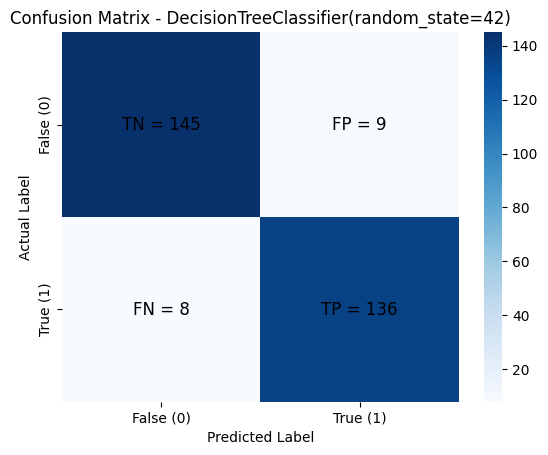

In [82]:
confusion_matrix1(dt1)

#### Random Forest

In [83]:
eval_classification(rf1)

Accuracy Score (Test Set): 97.65
Accuracy Score (Train Set): 100.00
Precision Score (Test Set): 96.53
Precision Score (Train Set): 100.00
Recall Score (Test Set): 98.58
Recall Score (Train Set): 100.00
F1 Score (Test Set): 97.54
F1 Score (Train Set): 100.00
ROC-AUC (Test-Proba): 99.08
ROC-AUC (Train-Proba): 100.00
Accuracy (Crossval Test): 95.76
Accuracy (Crossval Train): 100.00


Accuracy Score (Test Set): 97.65
Precision Score (Test Set): 96.53
Recall Score (Test Set): 98.58
F1 Score (Test Set): 97.54
ROC-AUC (Test-Proba): 99.08


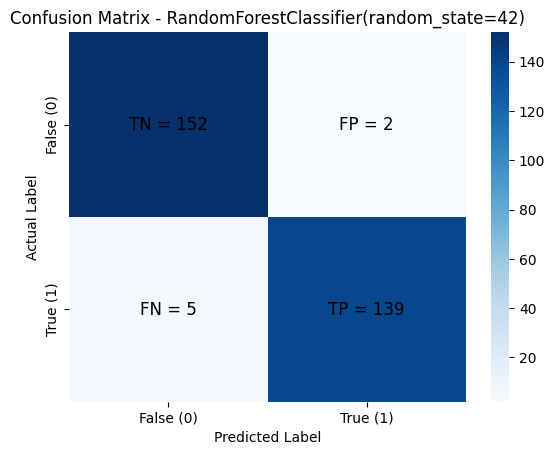

In [84]:
confusion_matrix1(rf1)

#### GradientBoost

In [85]:
eval_classification(gb1)

Accuracy Score (Test Set): 96.98
Accuracy Score (Train Set): 99.86
Precision Score (Test Set): 96.53
Precision Score (Train Set): 100.00
Recall Score (Test Set): 97.20
Recall Score (Train Set): 99.71
F1 Score (Test Set): 96.86
F1 Score (Train Set): 99.86
ROC-AUC (Test-Proba): 99.02
ROC-AUC (Train-Proba): 100.00
Accuracy (Crossval Test): 94.81
Accuracy (Crossval Train): 99.94


Accuracy Score (Test Set): 96.98
Precision Score (Test Set): 96.53
Recall Score (Test Set): 97.20
F1 Score (Test Set): 96.86
ROC-AUC (Test-Proba): 99.02


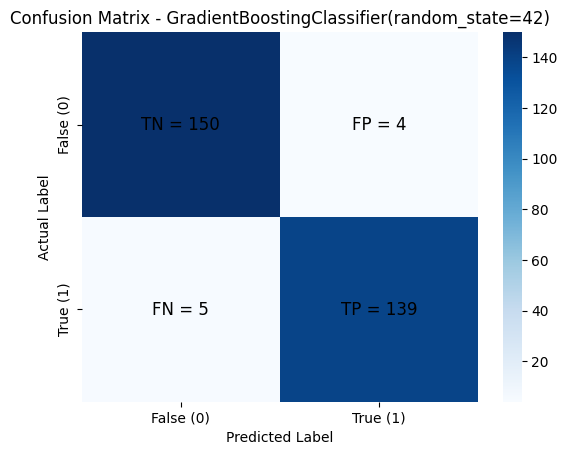

In [86]:
confusion_matrix1(gb1)

#### XGBoost

In [87]:
eval_classification(xgb1)

Accuracy Score (Test Set): 97.32
Accuracy Score (Train Set): 100.00
Precision Score (Test Set): 95.83
Precision Score (Train Set): 100.00
Recall Score (Test Set): 98.57
Recall Score (Train Set): 100.00
F1 Score (Test Set): 97.18
F1 Score (Train Set): 100.00
ROC-AUC (Test-Proba): 99.08
ROC-AUC (Train-Proba): 100.00
Accuracy (Crossval Test): 94.11
Accuracy (Crossval Train): 100.00


Accuracy Score (Test Set): 97.32
Precision Score (Test Set): 95.83
Recall Score (Test Set): 98.57
F1 Score (Test Set): 97.18
ROC-AUC (Test-Proba): 99.08


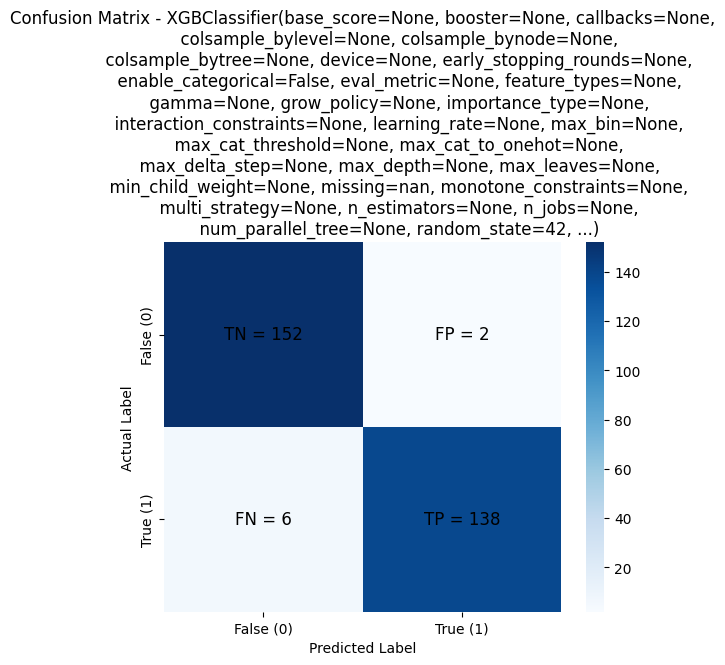

In [88]:
confusion_matrix1(xgb1)

> There are some overfitting models, to tackle this issue hyperparameter tuning will be done.

In [89]:
# # Printing metrics in form of classification report (Additional)
# from sklearn.metrics import classification_report

# def display_classification_reports(model_for_report):
#     model_for_report.fit(x1_train, y1_train)
#     y_pred = model_for_report.predict(x1_test)
#     print("Classification Report for", type(model_for_report).__name__)
#     print(classification_report(y1_test, y_pred))

# # Evaluate and print classification reports for all models
# for model in models:
#     display_classification_reports(model)

### Hyperparameter Tuning

In [90]:
?Pipeline

Init signature: Pipeline(steps, *, memory=None, verbose=False)
Docstring:     
A sequence of data transformers with an optional final predictor.

`Pipeline` allows you to sequentially apply a list of transformers to
preprocess the data and, if desired, conclude the sequence with a final
:term:`predictor` for predictive modeling.

Intermediate steps of the pipeline must be 'transforms', that is, they
must implement `fit` and `transform` methods.
The final :term:`estimator` only needs to implement `fit`.
The transformers in the pipeline can be cached using ``memory`` argument.

The purpose of the pipeline is to assemble several steps that can be
cross-validated together while setting different parameters. For this, it
enables setting parameters of the various steps using their names and the
parameter name separated by a `'__'`, as in the example below. A step's
estimator may be replaced entirely by setting the parameter with its name
to another estimator, or a transformer removed by sett

In [95]:
# Create pipeline for each of the classifiers.
pipelines = {'logisticregression1': Pipeline([('clf', LogisticRegression(random_state=42))]),
             'knn1': Pipeline([('clf', KNeighborsClassifier())]),
            'decisiontree1': Pipeline([('clf', DecisionTreeClassifier(random_state = 42))]),
            'randomforest1': Pipeline([('clf', RandomForestClassifier(random_state = 42))]),
            'gb1': Pipeline([('clf', GradientBoostingClassifier(random_state = 42))]),
            'xgboost1': Pipeline([('clf', XGBClassifier(random_state=42))])}

# Define Hyperparameters for each pipeline
hyperparameters_lr1 ={'clf__C': [float(x) for x in np.linspace(0.002, 1, 100)],
                      'clf__penalty' : ['l2'],
                      'clf__solver' : ['newton-cg', 'lbfgs', 'newton-cholesky', 'liblinear'],
                      'clf__max_iter':[10000]}

hyperparameters_dt1 ={'clf__criterion' : ['entropy', 'gini'],
                      'clf__max_depth' : [int(x) for x in np.linspace(1, 20, 20)],
                      'clf__min_samples_split' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__min_samples_leaf' : [int(x) for x in np.linspace(start = 2, stop = 50, num = 5)],
                      'clf__max_features' : ['sqrt'],
                      'clf__splitter' : ['best']}

hyperparameters_rf1 ={'clf__n_estimators': [50, 60, 75, 100, 120],
                     'clf__criterion': ['entropy', 'gini'],
                     'clf__max_features':['sqrt' , None],
                     'clf__min_samples_leaf':[0.05, 0.1, 0.2]}

hyperparameters_knn1 ={'clf__n_neighbors' : list(range(1,30)),
                       'clf__weights' : ['uniform'],
                       'clf__p' : [1, 2],
                       'clf__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

hyperparameters_gb1 ={'clf__n_estimators' : [int(x) for x in np.linspace(10, 50, num = 5)],
                      'clf__criterion' : ['friedman_mse', 'squared_error'],
                      'clf__max_depth' : [1, 2, 3],
                      'clf__min_samples_split' : [2, 3, 5],
                      'clf__min_samples_leaf' : [2, 3, 5],
                      'clf__max_features' : ['sqrt'],
                      'clf__loss' : ['exponential']}

hyperparameters_xgb1 ={'clf__eta': [float(x) for x in np.linspace(0.1, 0.7, 20)],
                     'clf__max_depth': [1, 3, 5],
                     'clf__nthread' : [2, 4, 6, 8],
                     'clf__tree_method' : ['approx', 'hist']}

# Instantiate hyperparapeter dictionary
hyperparameters = {'logisticregression1':hyperparameters_lr1,
                   'decisiontree1':hyperparameters_dt1,
                   'randomforest1':hyperparameters_rf1,
                   'knn1':hyperparameters_knn1,
                   'gb1':hyperparameters_gb1,
                   'xgboost1': hyperparameters_xgb1}

In [96]:
fitted_models1, fit_time1 = grid_pipe1(pipelines, hyperparameters, scoring='accuracy')

Fitting 25 folds for each of 400 candidates, totalling 10000 fits
The logisticregression1 model has been fitted.
Total Fit Time: 89.685s
Best accuracy: 0.945
Best params:
 {'clf__C': 0.4253939393939394, 'clf__max_iter': 10000, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'} 

Fitting 25 folds for each of 232 candidates, totalling 5800 fits
The knn1 model has been fitted.
Total Fit Time: 55.612s
Best accuracy: 0.719
Best params:
 {'clf__algorithm': 'auto', 'clf__n_neighbors': 28, 'clf__p': 1, 'clf__weights': 'uniform'} 

Fitting 25 folds for each of 1000 candidates, totalling 25000 fits
The decisiontree1 model has been fitted.
Total Fit Time: 38.032s
Best accuracy: 0.929
Best params:
 {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 50, 'clf__splitter': 'best'} 

Fitting 25 folds for each of 60 candidates, totalling 1500 fits
The randomforest1 model has been fitted.
Total Fit Time: 45.903s
Best accura

### Train Tuned Models

In [97]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Initiatialize object for each model
lg1_tuned = LogisticRegression(random_state=42, C=0.4253939393939394, max_iter=10000, penalty='l2', solver='newton-cg')
knn1_tuned = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 28, p = 1, weights = 'uniform')
dt1_tuned = DecisionTreeClassifier(random_state=42, criterion = 'entropy', max_depth = 4, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 50, splitter = 'best')
rf1_tuned = RandomForestClassifier(random_state=42, criterion = 'entropy', max_features = 'sqrt', min_samples_leaf = 0.05, n_estimators = 100)
gb1_tuned = GradientBoostingClassifier(random_state=42, criterion = 'friedman_mse', loss = 'exponential', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 3, min_samples_split = 2, n_estimators = 50)
xgb1_tuned = XGBClassifier(random_state=42, eta=0.19473684210526315, max_depth = 1, nthread=6, tree_method='approx')

models = [lg1_tuned, knn1_tuned, dt1_tuned, rf1_tuned, gb1_tuned, xgb1_tuned]

# Train models
for model in models :
    model.fit(x1_train, y1_train)

### Evaluate Tuned Models

#### Logistic Regression

In [98]:
eval_classification(lg1_tuned)

Accuracy Score (Test Set): 97.32
Accuracy Score (Train Set): 96.39
Precision Score (Test Set): 96.53
Precision Score (Train Set): 97.92
Recall Score (Test Set): 97.89
Recall Score (Train Set): 94.81
F1 Score (Test Set): 97.20
F1 Score (Train Set): 96.34
ROC-AUC (Test-Proba): 99.24
ROC-AUC (Train-Proba): 99.08
Accuracy (Crossval Test): 94.49
Accuracy (Crossval Train): 95.01


Accuracy Score (Test Set): 97.32
Precision Score (Test Set): 96.53
Recall Score (Test Set): 97.89
F1 Score (Test Set): 97.20
ROC-AUC (Test-Proba): 99.24


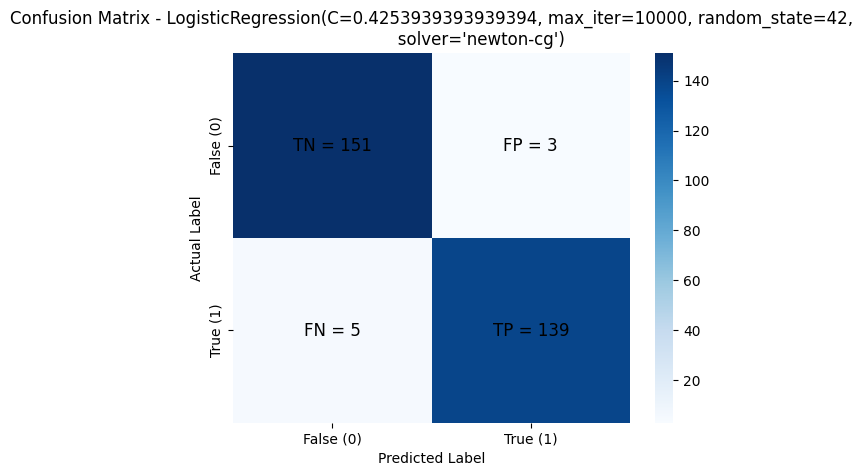

In [99]:
confusion_matrix1(lg1_tuned)

#### K-Nearest Neighbours

In [100]:
eval_classification(knn1_tuned)

Accuracy Score (Test Set): 67.45
Accuracy Score (Train Set): 72.73
Precision Score (Test Set): 52.08
Precision Score (Train Set): 77.05
Recall Score (Test Set): 72.82
Recall Score (Train Set): 64.84
F1 Score (Test Set): 60.73
F1 Score (Train Set): 70.42
ROC-AUC (Test-Proba): 71.65
ROC-AUC (Train-Proba): 79.54
Accuracy (Crossval Test): 71.95
Accuracy (Crossval Train): 72.97


Accuracy Score (Test Set): 67.45
Precision Score (Test Set): 52.08
Recall Score (Test Set): 72.82
F1 Score (Test Set): 60.73
ROC-AUC (Test-Proba): 71.65


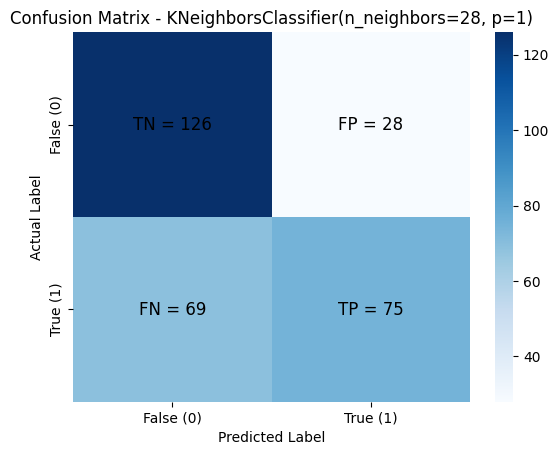

In [101]:
confusion_matrix1(knn1_tuned)

#### Decision Tree

In [102]:
eval_classification(dt1_tuned)

Accuracy Score (Test Set): 94.63
Accuracy Score (Train Set): 94.66
Precision Score (Test Set): 95.14
Precision Score (Train Set): 94.03
Recall Score (Test Set): 93.84
Recall Score (Train Set): 95.39
F1 Score (Test Set): 94.48
F1 Score (Train Set): 94.71
ROC-AUC (Test-Proba): 95.46
ROC-AUC (Train-Proba): 96.44
Accuracy (Crossval Test): 92.87
Accuracy (Crossval Train): 94.44


Accuracy Score (Test Set): 94.63
Precision Score (Test Set): 95.14
Recall Score (Test Set): 93.84
F1 Score (Test Set): 94.48
ROC-AUC (Test-Proba): 95.46


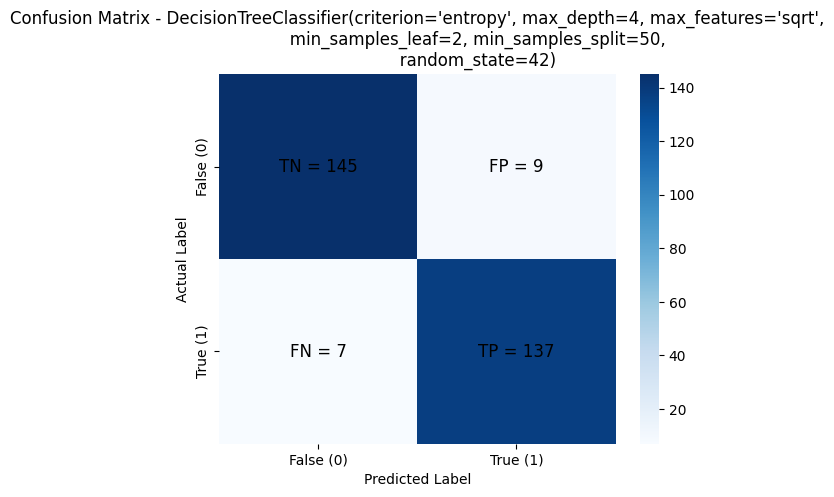

In [103]:
confusion_matrix1(dt1_tuned)

#### Random Forest

In [104]:
eval_classification(rf1_tuned)

Accuracy Score (Test Set): 95.97
Accuracy Score (Train Set): 95.09
Precision Score (Test Set): 94.44
Precision Score (Train Set): 95.89
Recall Score (Test Set): 97.14
Recall Score (Train Set): 94.24
F1 Score (Test Set): 95.77
F1 Score (Train Set): 95.06
ROC-AUC (Test-Proba): 99.04
ROC-AUC (Train-Proba): 99.15
Accuracy (Crossval Test): 94.43
Accuracy (Crossval Train): 95.48


Accuracy Score (Test Set): 95.97
Precision Score (Test Set): 94.44
Recall Score (Test Set): 97.14
F1 Score (Test Set): 95.77
ROC-AUC (Test-Proba): 99.04


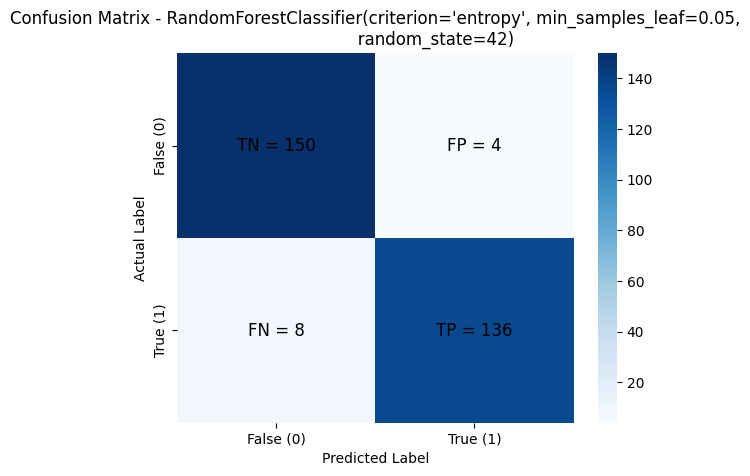

In [105]:
confusion_matrix1(rf1_tuned)

#### GradientBoost

In [106]:
eval_classification(gb1_tuned)

Accuracy Score (Test Set): 96.98
Accuracy Score (Train Set): 97.84
Precision Score (Test Set): 96.53
Precision Score (Train Set): 98.82
Recall Score (Test Set): 97.20
Recall Score (Train Set): 96.83
F1 Score (Test Set): 96.86
F1 Score (Train Set): 97.82
ROC-AUC (Test-Proba): 99.21
ROC-AUC (Train-Proba): 99.78
Accuracy (Crossval Test): 95.53
Accuracy (Crossval Train): 98.14


Accuracy Score (Test Set): 96.98
Precision Score (Test Set): 96.53
Recall Score (Test Set): 97.20
F1 Score (Test Set): 96.86
ROC-AUC (Test-Proba): 99.21


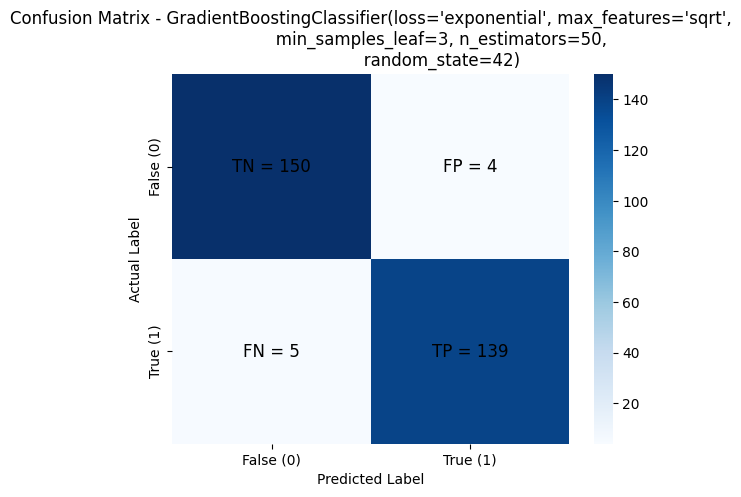

In [107]:
confusion_matrix1(gb1_tuned)

#### XGBoost

In [108]:
eval_classification(xgb1_tuned)

Accuracy Score (Test Set): 97.65
Accuracy Score (Train Set): 97.55
Precision Score (Test Set): 97.22
Precision Score (Train Set): 99.11
Recall Score (Test Set): 97.90
Recall Score (Train Set): 95.97
F1 Score (Test Set): 97.56
F1 Score (Train Set): 97.51
ROC-AUC (Test-Proba): 99.04
ROC-AUC (Train-Proba): 99.58
Accuracy (Crossval Test): 95.67
Accuracy (Crossval Train): 97.56


Accuracy Score (Test Set): 97.65
Precision Score (Test Set): 97.22
Recall Score (Test Set): 97.90
F1 Score (Test Set): 97.56
ROC-AUC (Test-Proba): 99.04


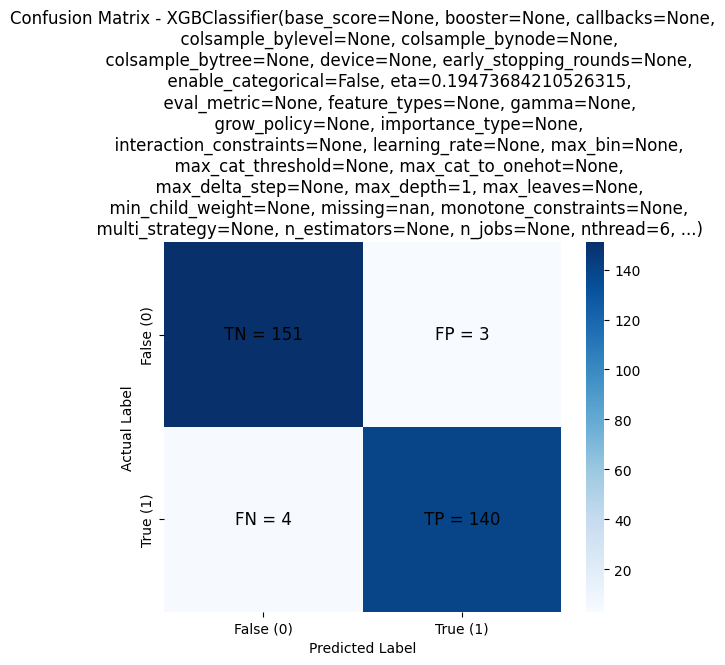

In [109]:
confusion_matrix1(xgb1_tuned)

## **After Normalization/Standardization**

### Helper Function

In [ ]:
# Import metrics score that will be evalueated
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
import time

# Evaluation score calculation
def eval_classification(model):
    y_pred = model.predict(x2_test)
    y_pred_train = model.predict(x2_train)
    y_pred_proba = model.predict_proba(x2_test)
    y_pred_proba_train = model.predict_proba(x2_train)

    # Print evaluation scores
    print(f"Accuracy Score (Test Set): {accuracy_score(y_pred, y2_test)* 100:.2f}")
    print(f"Accuracy Score (Train Set): {accuracy_score(y2_train, y_pred_train)* 100:.2f}")

    print(f"Precision Score (Test Set): {precision_score(y_pred, y2_test)* 100:.2f}")
    print(f"Precision Score (Train Set): {precision_score(y2_train, y_pred_train)* 100:.2f}")

    print(f"Recall Score (Test Set): {recall_score(y_pred, y2_test)* 100:.2f}")
    print(f"Recall Score (Train Set): {recall_score(y2_train, y_pred_train)* 100:.2f}")

    print(f"F1 Score (Test Set): {f1_score(y_pred, y2_test)* 100:.2f}")
    print(f"F1 Score (Train Set): {f1_score(y2_train, y_pred_train)* 100:.2f}")
    
    print(f"ROC-AUC (Test-Proba): {roc_auc_score(y2_test, y_pred_proba[:, 1])* 100:.2f}")
    print(f"ROC-AUC (Train-Proba): {roc_auc_score(y2_train, y_pred_proba_train[:, 1])* 100:.2f}")

    # Cross Validation
    cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 5)
    score = cross_validate(model, x2_train, y2_train, cv=cv, scoring='accuracy', return_train_score=True) # Scoring change based on what metrics we want to validate (usually choose the main performance metric)
    print(f'Accuracy (Crossval Test): {score['test_score'].mean()* 100:.2f}') 
    print(f'Accuracy (Crossval Train): {score['train_score'].mean()* 100:.2f}')

def grid_pipe1(pipedict, hyperdict, scoring='accuracy', display=True):
    fitted_models1 = {}
    fit_time1 = []
    for name, pipeline in pipedict.items():

    # Construct grid search
        cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 5)
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=cv, verbose=2, n_jobs=-1, return_train_score = True, error_score='raise')

        # Fit using grid search
        start = time.time()
        model.fit(x2_train, y2_train)
        end = time.time()
        fit_time2.append(round(end-start, 2))

        #Append model
        fitted_models2[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # print fit time
            print('Total Fit Time: %.3fs' % (end-start))
            # Best accuracy
            print('Best accuracy: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')

    return fitted_models2, fit_time2 

def confusion_matrix1(model):
    y_pred = model.predict(x2_test)
    y_pred_proba = model.predict_proba(x2_test)

    print(f"Accuracy Score (Test Set): {accuracy_score(y_pred, y2_test) * 100:.2f}")
    print(f"Precision Score (Test Set): {precision_score(y_pred, y2_test) * 100:.2f}")
    print(f"Recall Score (Test Set): {recall_score(y_pred, y2_test) * 100:.2f}")
    print(f"F1 Score (Test Set): {f1_score(y_pred, y2_test) *100:.2f}")
    print(f"ROC-AUC (Test-Proba): {roc_auc_score(y2_test, y_pred_proba[:, 1]) *100:.2f}")

    conf_mat = confusion_matrix(y2_test, y_pred)
    ax = plt.subplot()
    sns.heatmap(conf_mat, ax=ax, fmt='d', cmap='Blues', xticklabels=['False (0)', 'True (1)'], yticklabels=['False (0)', 'True (1)'])

    # Add annotations for TN, FN, FP, TP
    for i in range(2):
        for j in range(2):
            if i == 0 and j == 0:
                text = f'TN = {conf_mat[i, j]}'
            elif i == 1 and j == 0:
                text = f'FN = {conf_mat[i, j]}'
            elif i == 0 and j == 1:
                text = f'FP = {conf_mat[i, j]}'
            elif i == 1 and j == 1:
                text = f'TP = {conf_mat[i, j]}'

            plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black', fontsize=12)
            
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {str(model)}')

### Feature Importances from Classification Models

In [146]:
# Function for model feature importance score
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    # Add labels to the bars
    for i, v in enumerate(model.feature_importances_):
        ax.text(v, i, f'{v:.2f}', ha='left', va='center', color='black')  # Corrected line

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature importance score')
    plt.show()

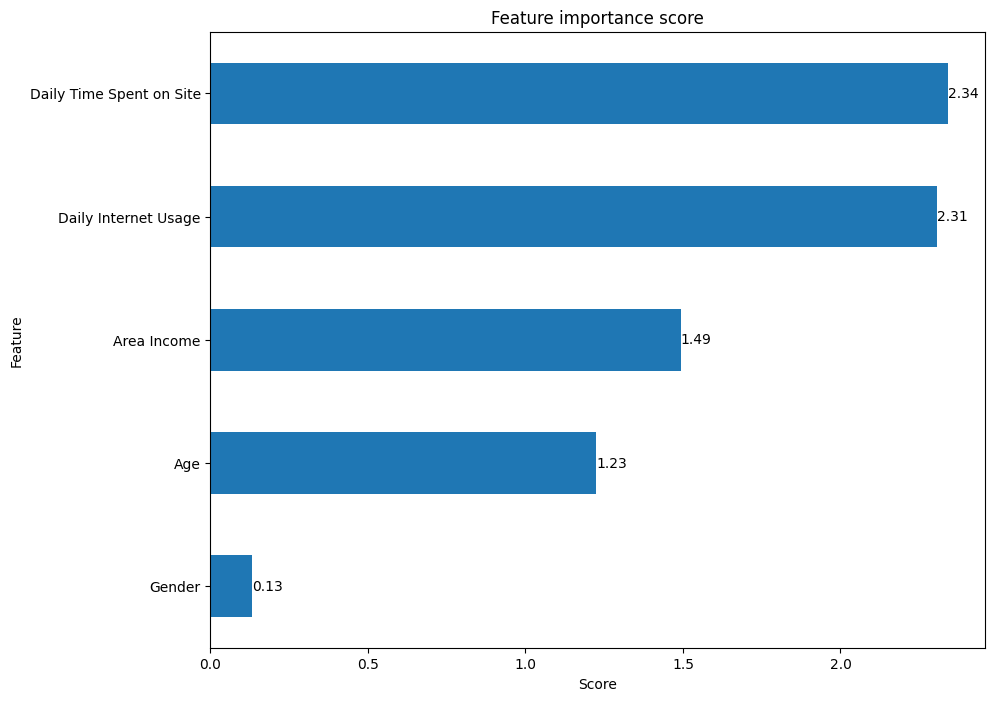

In [167]:
# Logistic regression feature importance
lg_features_importance = pd.DataFrame({'Coefficient': np.abs(lg.coef_.reshape(5))}, index=x.columns)

lg_features_importance = lg_features_importance.sort_values(by='Coefficient', ascending=False)

# Plot the horizontal bar plot
ax = lg_features_importance.plot(kind='barh', figsize=(10, 8), legend=False)

# Invert y-axis to display the most important features at the top
ax.invert_yaxis()

# Add labels to the bars
for i, v in enumerate(lg_features_importance.values):
    ax.text(v[0], i, f'{v[0]:.2f}', ha='left', va='center', color='black')

plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature importance score')
plt.show()

In the model generated using the logistic regression algorithm, the features contributing to the prediction results sorted from the most important are Daily Internet Usage, Daily Time Spent on Site, Area Income, Age, and lastly Gender.